In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             886.004428           663.774500  Central Electricity Authority   
4            6243.000000          5385.579736  C

Here we can see The dataset contains the details of Global Power Plant this dataset is 908 rows and 25 columns including 2 target variables capacity_mv and primary_fuel(Fuel_Type) where we need to predict both capacity_mv and Fuel_Type.

In [3]:
#Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace = True)

In [4]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude Fuel_Type other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407     Solar         NaN         NaN  ...   
1   24.7663    74.6090      Coal         NaN         NaN  ...   
2   21.9038    69.3732      Wind         NaN         NaN  ...   
3   23.8712    91.3602       Gas         NaN         NaN  ...   
4   21.9603    82.4091      Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

# Exploratory Data Analysis(EDA)

In [5]:
df.shape

(908, 25)

This dataset contains 908 rows and 25 columns.

In [6]:
#checking the types of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see the dataset contains different features with different data types. There are two types of data namely object type and flot64 data type. We will take care of the object datatype using encoding techniques later.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_Type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Using the info() function a short summary of the global power plant dataframe is made and print the information about the dataframe including the index dtypes and column dtypes, non-null values and memory usage.

In [8]:
#checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

From the above cell we can check the no. of unique values present in each columns.
Here the columns country,country_long ,other_fuel2, year_of_capacity_data and generation_data-source have only 1 unique value. Also other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entires thoughout the dataset so we can drop these columns.

In [9]:
#checking the count of the country
df["country"].value_counts()

country
IND    908
Name: count, dtype: int64

There is only 1 country in this dataset we can drop this as it has nothing to do with our prediction also we can drop the column country_long on this basis.

In [10]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [11]:
#dropping irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [12]:
#checking the count of name 
df['name'].value_counts()

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: count, Length: 908, dtype: int64

We can observe that the name column has unique name for each power plant so dropping this column is good to go.

In [13]:
df.drop(["name"],axis=1,inplace=True)

In [14]:
#checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [15]:
df.drop(['gppd_idnr'],axis=1,inplace=True)

The column Owner has more than 65% of null values also it may not important for prediction, so we can drop it

In [16]:
df.drop(['owner'],axis=1,inplace=True)

The column url also have no relation with the targests and it has nothing to do with prediction so we can drop it as well.

In [17]:
df.drop(['url'],axis=1,inplace=True)

In the above cells we dropped the columns which are irrelavent and may not required for our prediction.

In [18]:
#checking the null values in the dataframe 
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

We can see there are huge missing values present in most of the columns. We will fill them imputation techniques after checking skewness in these columns.

<Axes: >

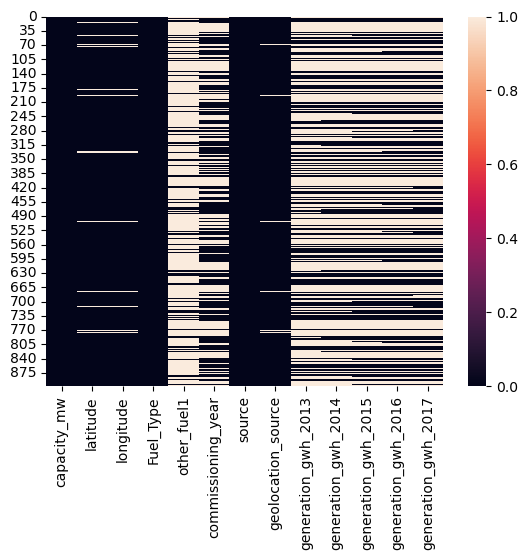

In [19]:
#let's visualize the null values clearly
sns.heatmap(df.isnull())

we can easily see the while lines in the heatmap which indicates the missing values in the dataset.

In [20]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   908.000000  862.000000  862.000000          528.000000   
mean    321.046378   21.196189   77.447848         1996.876894   
std     580.221767    6.248627    4.907260           17.047817   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.837500   16.771575   74.258975         1988.000000   
50%      60.000000   21.778300   76.719250         2000.000000   
75%     388.125000   25.516375   79.441475         2011.250000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           384.000000           401.000000           425.000000   
mean           2304.059202          2420.393316          2414.072373   
std            3794.767492          4013.558173          4183.203199   
min               0.000000             0.000000             0.000000   
25%             244.458088           223.650436           174.174750   
50%             797.063475           805.760000           701.027250   
75%            2795.021500          3034.575000          3080.000000   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           437.000000           443.000000  
mean           2453.936292          2531.754458  
std            4152.038216          4187.236364  
min               0.000000             0.000000  
25%             187.193669           177.643170  
50%             716.728350           807.601700  
75%            3263.483000          3258.785000  
max           30015.000000         35116.000000

The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers so we can use mean method to fill the outliers.

In [21]:
#Let's check the mean of the latitude 
df['latitude'].mean()     

21.196188863109047

We can replace the null values using this mean

In [22]:
#filling missing values in latitude using mean 
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [23]:
#Let's check the mode of other_fuel1
df['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

We can fill the null values using this mode in other_fuel1 column

In [24]:
#Let's check the mode of geolocation_source column
df['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

We can fill the null values using this mode in geolocation_source column

So the modes of other_fuel1 and geoloaction_source are Oil and WRI respectively which means they have more value counts in those columns.Let's fill the null values of categorical columns by their respective modes.

In [25]:
#Replacing the null values by its mode oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [26]:
#Replacing the null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

The columns longitude commissioning year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method

In [27]:
#filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [28]:
#let's check the null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Now we have removed all the null values using imputation method and the data is now clean. So we can move further.

#Let's visualize  the null values clearly
sns.heatmap(df.isnull())

<Axes: >

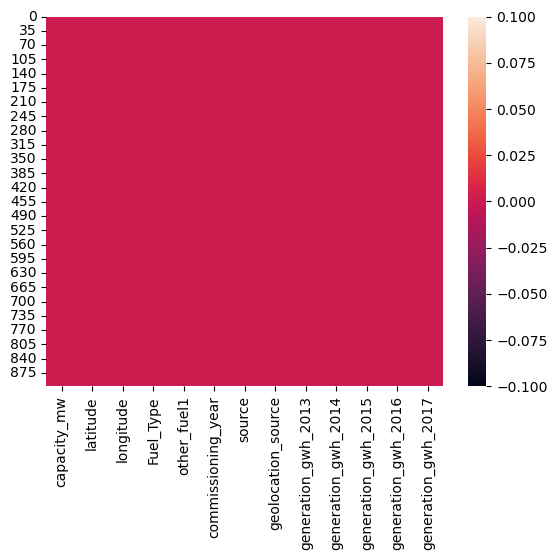

In [29]:
sns.heatmap(df.isnull())

So it is clear that there are no missing values present in the dataset.

In [30]:
#checking  how many columns  are there in the dataset
df.columns.tolist()

['capacity_mw',
 'latitude',
 'longitude',
 'Fuel_Type',
 'other_fuel1',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

These are the columns present  in the dataset.

In [31]:
#Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64

There are unique counts present in capacity_mw columns

In [32]:
#Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Fuel_Type
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [33]:
#Checking the uniqueness of primary_fuel
df['Fuel_Type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are the unique classes present in the primary_fuel columns.

In [34]:
#Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

commissioning_year
2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1946.0      1
1956.0      1
1937.0      1
1959.0      1
1953.0      1
Name: count, Length: 73, dtype: int64

There are the counts of commissioning years of the power plants.

In [35]:
#Let's extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age']=2018-df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [36]:
#Let's check the data frame
df.head()

capacity_mw  latitude  longitude Fuel_Type other_fuel1  \
0          2.5   28.1839    73.2407     Solar         Oil   
1         98.0   24.7663    74.6090      Coal         Oil   
2         39.2   21.9038    69.3732      Wind         Oil   
3        135.0   23.8712    91.3602       Gas         Oil   
4       1800.0   21.9603    82.4091      Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0           716.728350           807.601700              7.0  
1           716.728350           807.601700             18.0  
2           716.728350           807.601700             18.0  
3           886.004428           663.774500             14.0  
4          6243.000000          5385.579736              3.0

In [37]:
#Checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, Fuel_Type, other_fuel1, source, geolocation_source, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, Power_plant_age]
Index: []

In [38]:
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
       categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


So these are the categorical columns in the given dataset.

In [39]:
#now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
       numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


In the above cell all the columns are numerical present in the dataset.

# Data Visualization

# Univariate Analysis

Plotting Categorical columns

Fuel_Type
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64


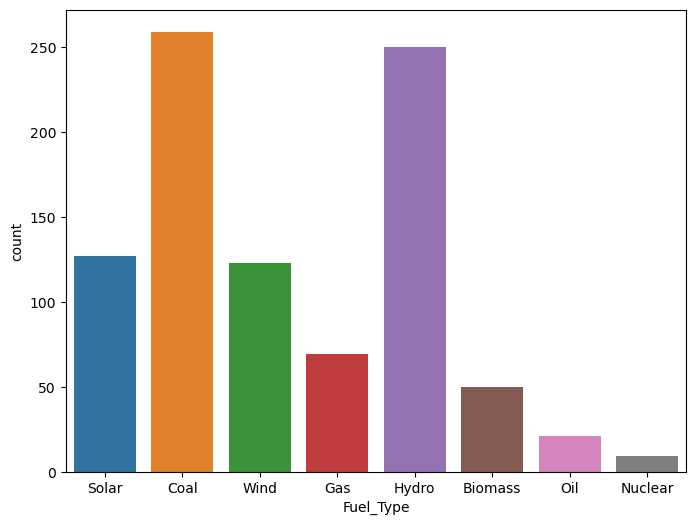

In [40]:
#Visualzing the types of fuel in primary_fuel
print(df['Fuel_Type'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='Fuel_Type', data=df)
plt.show()

In the above cell the count plot shows the energy source used in primary electricity generation. Here using the source Coal(thermal)generates more electricity followed by Hydro(water). Also the energy source Nuclear generates very less electricity compare to other.

other_fuel1
Oil             905
Gas               2
Cogeneration      1
Name: count, dtype: int64


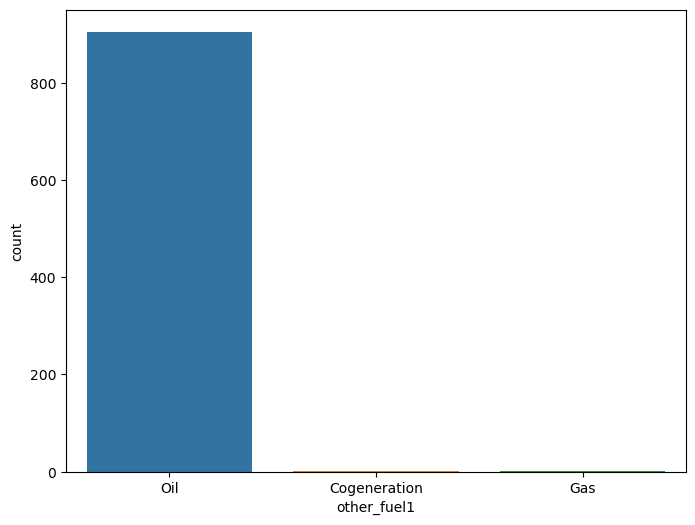

In [41]:
#Visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel1',data=df)
plt.show()

Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.

geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


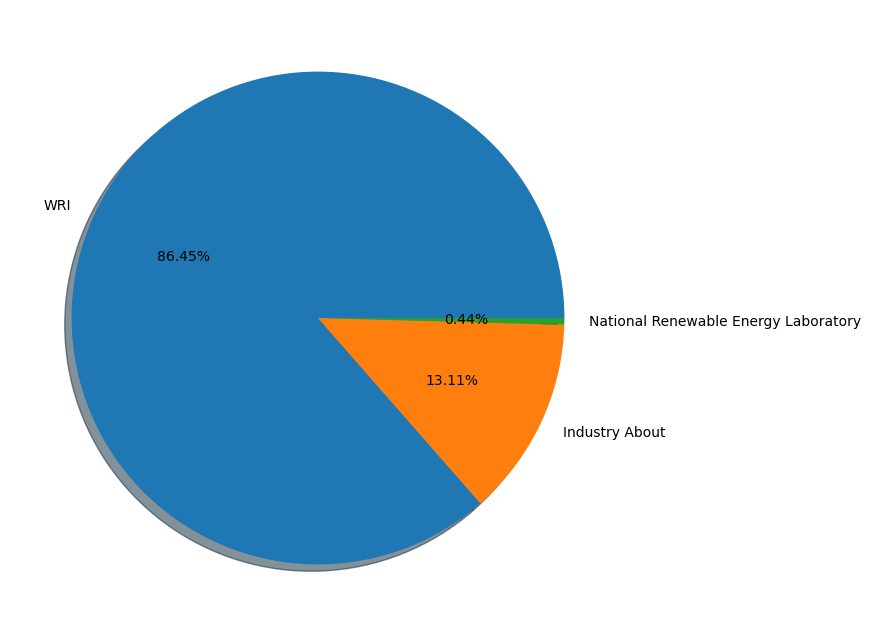

In [42]:
#visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

As in the above cell the plot shows that the geolocation source WRI has highest counts which means WRI gives the more geolocation information compare to other two sources.

# Distribution of skewness

Plotting Numerical Columns

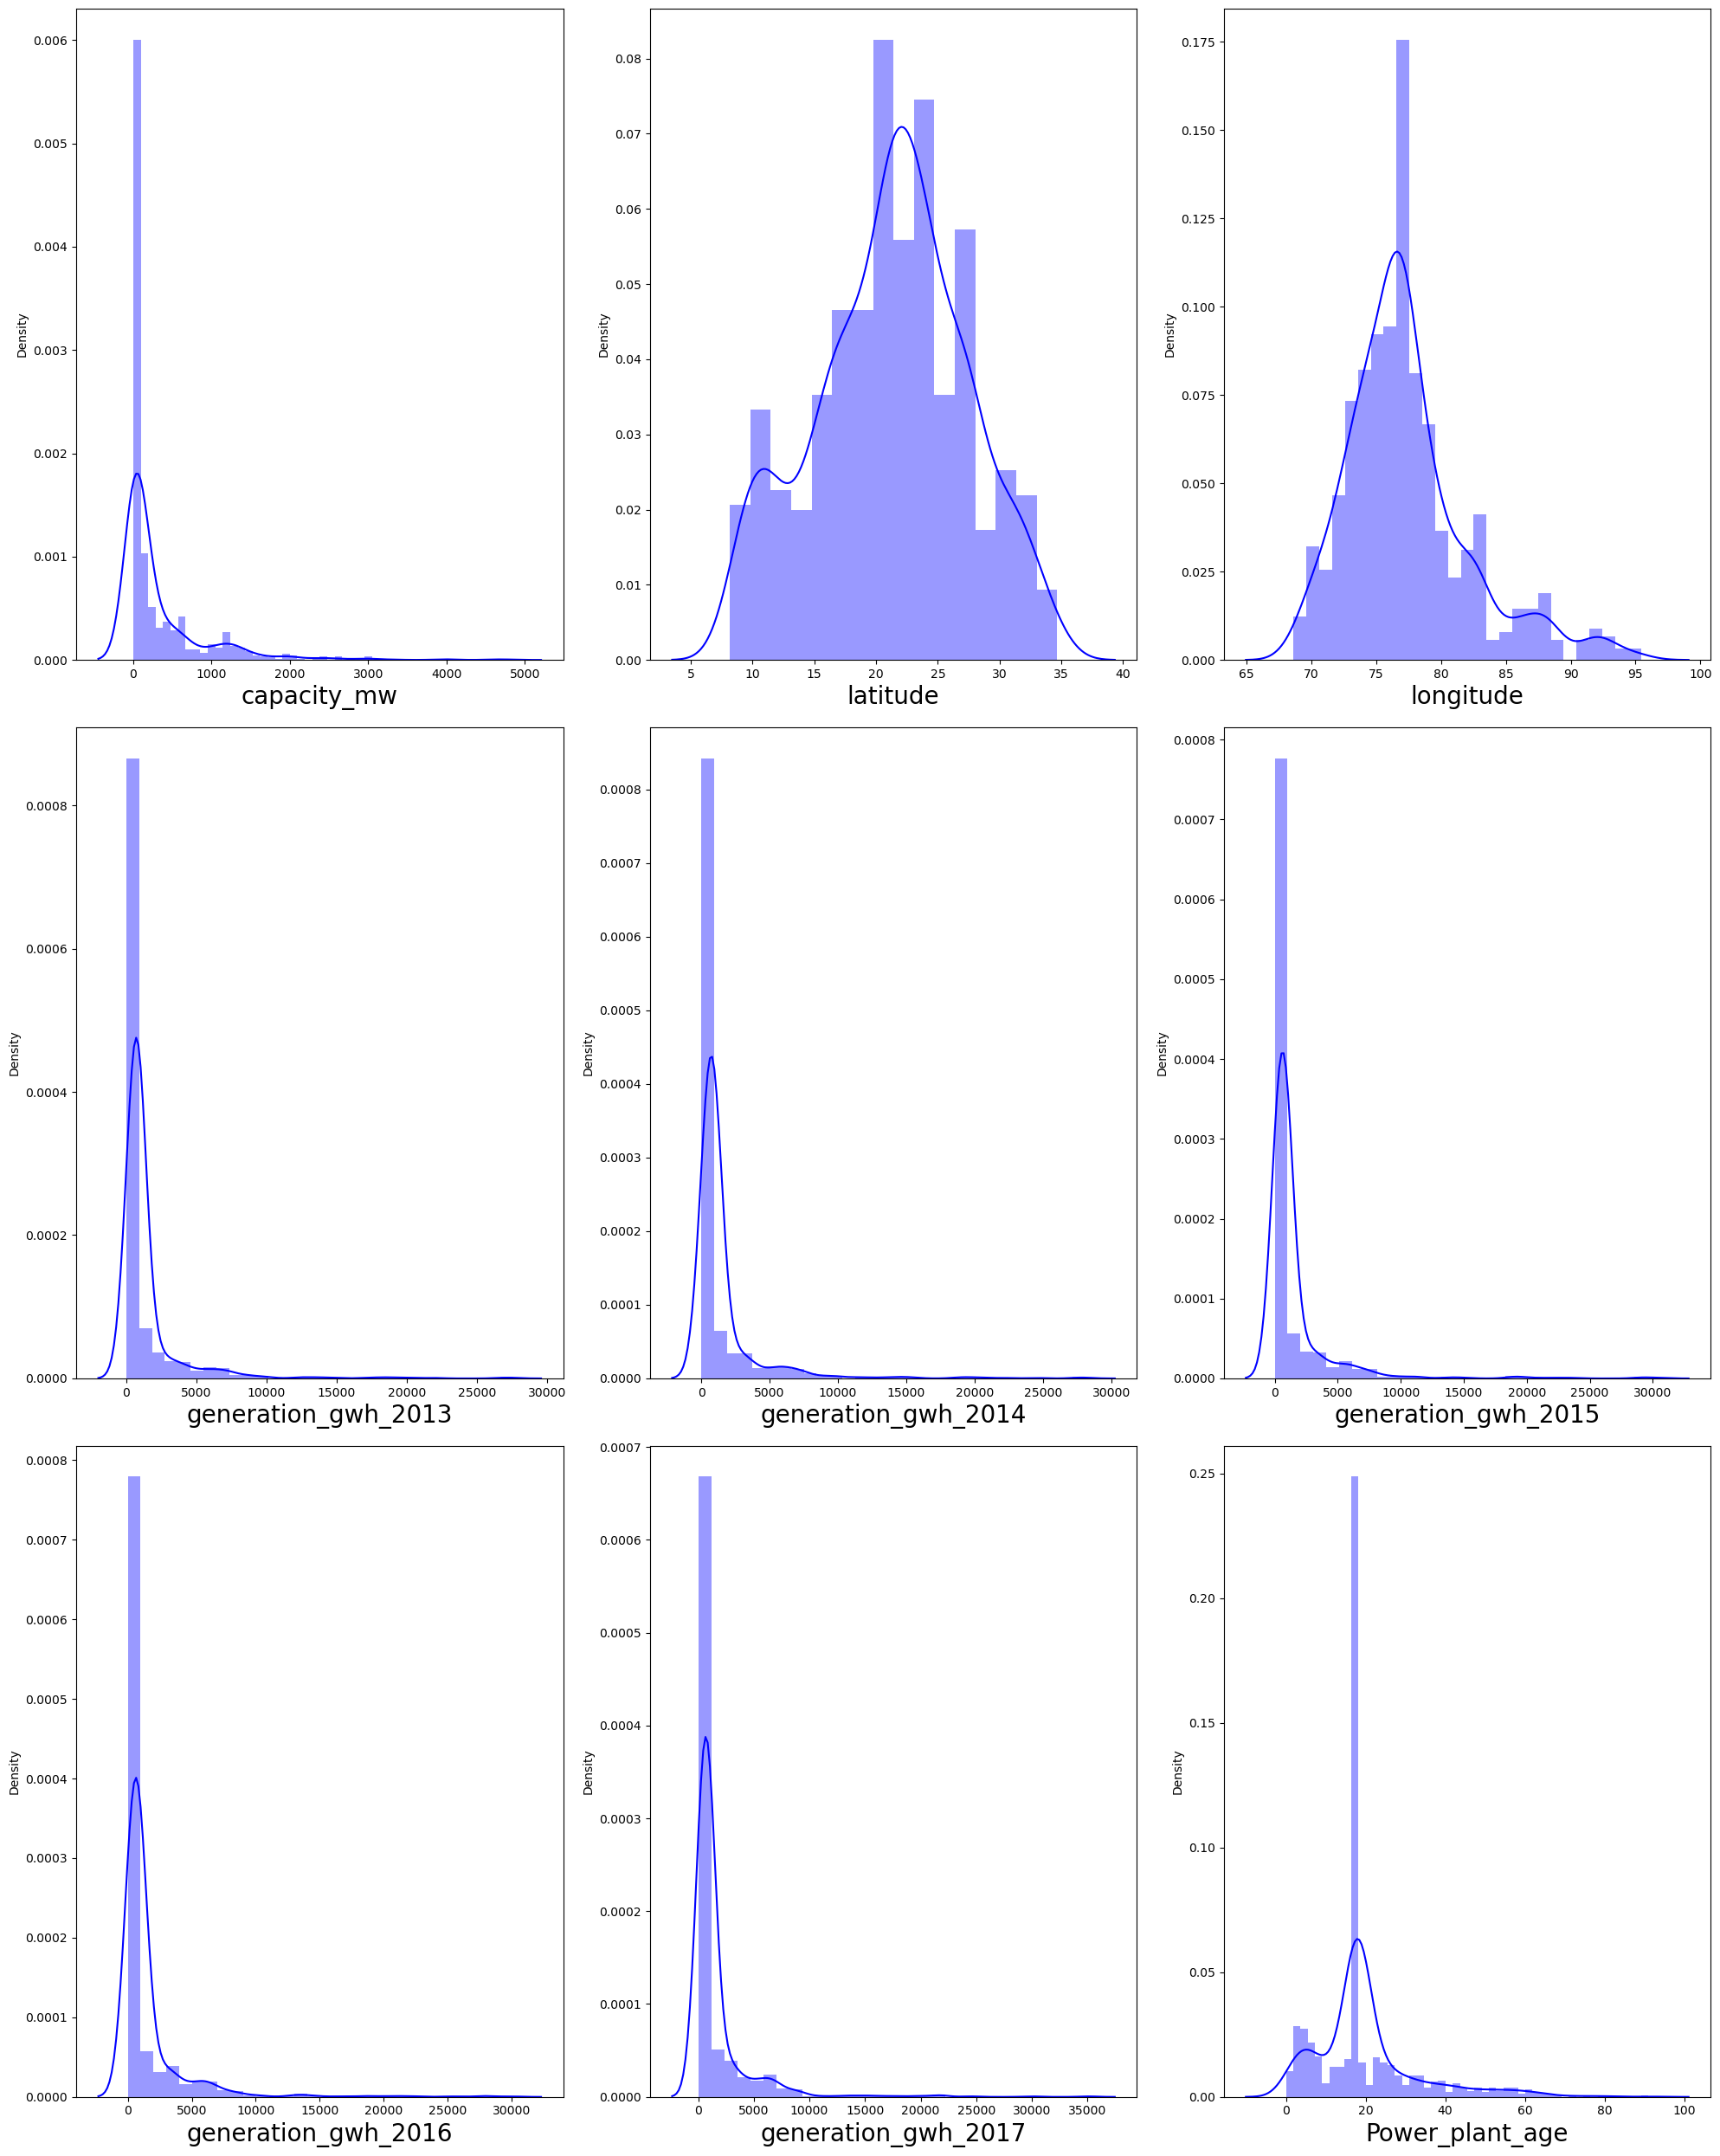

In [43]:
#checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:
    - From the above distribution plots we can observe that the data is not normally distributed in all the columns except latitude and longitude.
    - In most of the columns the mean is greater than the median which means they are skewed to right.
    - We will remove these skewness in all the columns except the label in the later part.

# Comparing Target Varibale capacity_mw with Features

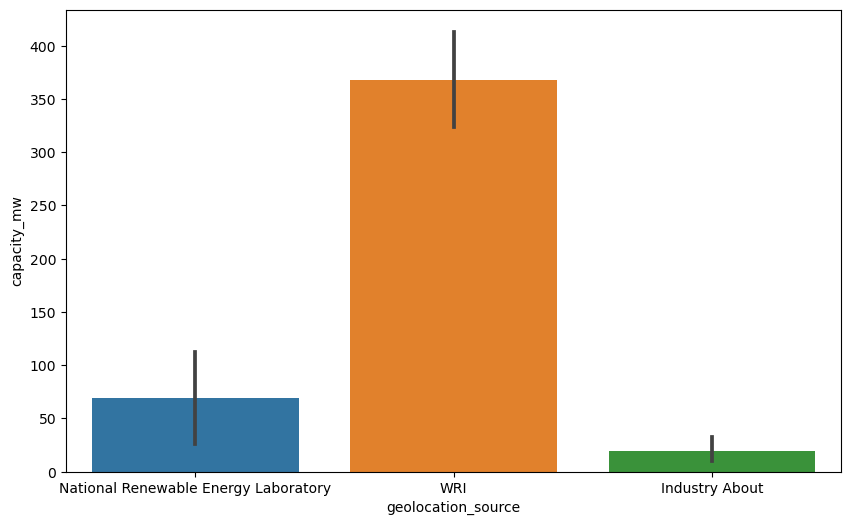

In [44]:
#Let's Check the relation between source and capacity_mw
plt.figure (figsize = (10,6))
sns.barplot(x='geolocation_source', y='capacity_mw',data=df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity.

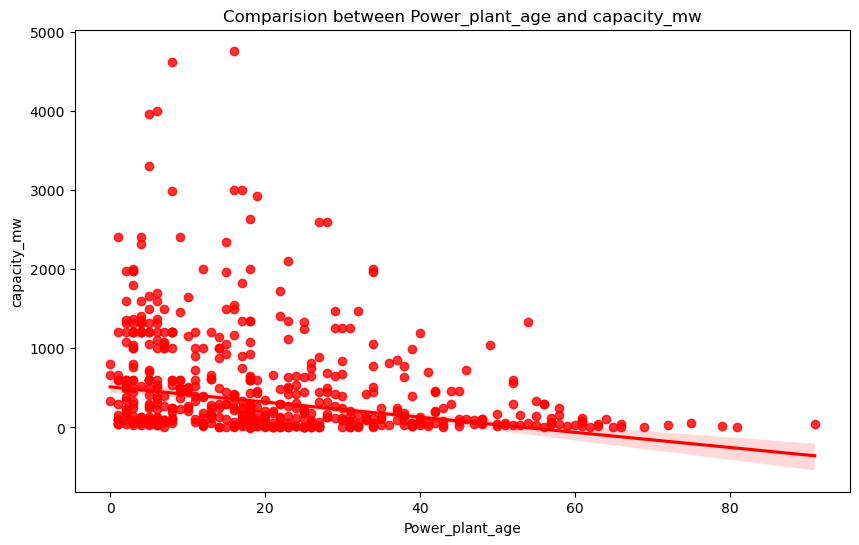

In [45]:
#Let's check how the Power_plant_age affects the capacityof the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x='Power_plant_age',y='capacity_mw',data=df,color = 'r');

From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

<Axes: title={'center': 'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

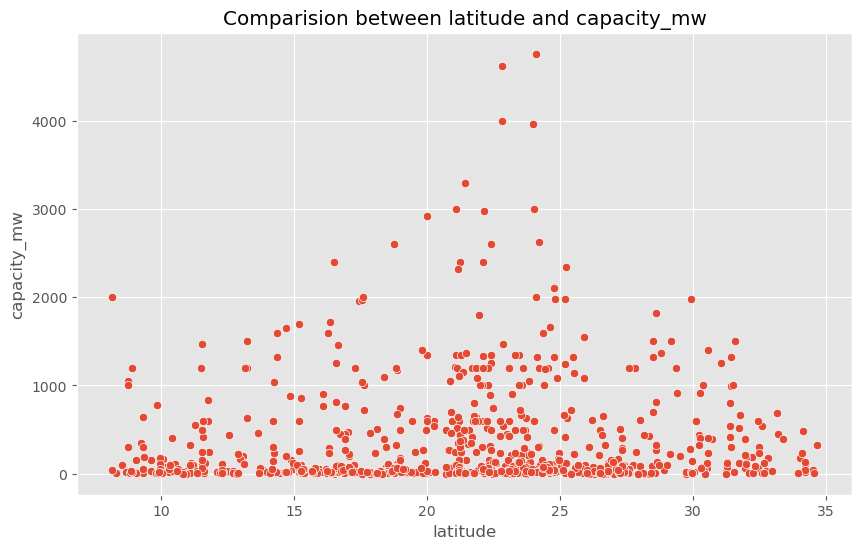

In [46]:
# Let's check how the capacity is related to latitude of the power plant 
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(x='latitude',y='capacity_mw',data=df)

The plot shows that there is no linear relation between latitude and capacity of the power plant. We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.

<Axes: title={'center': 'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

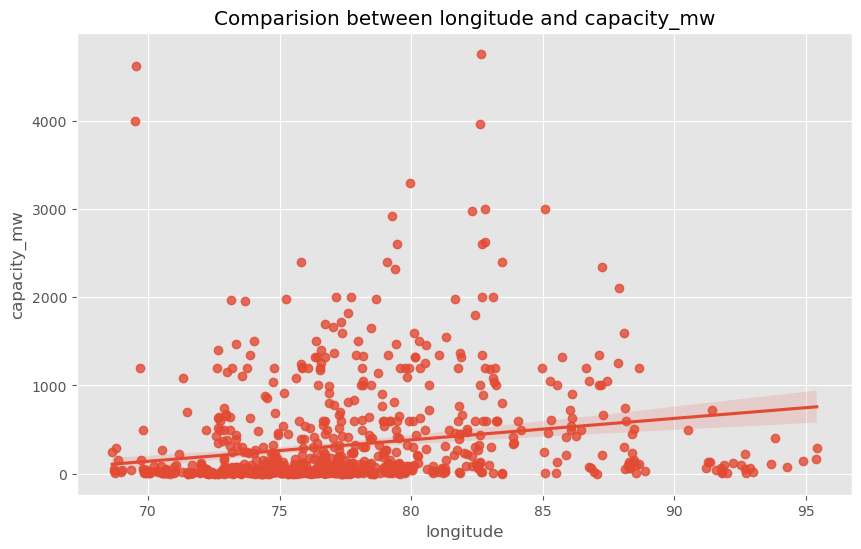

In [47]:
#Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(x='longitude',y='capacity_mw',data=df)

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

<Axes: title={'center': 'comparision between generation_gwh_2013 and capacity_mw'}, xlabel='generation_gwh_2013', ylabel='capacity_mw'>

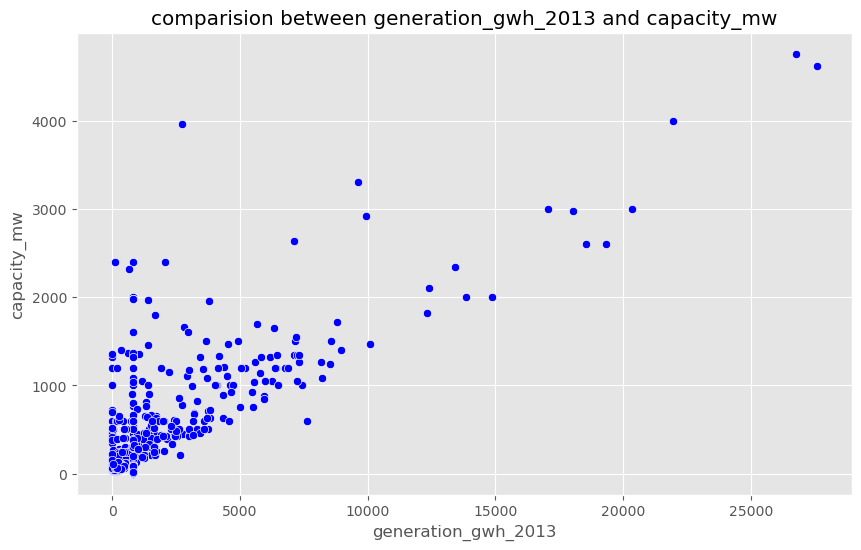

In [48]:
#Let's check the capacity of the plant in generation _gwh_2013
plt.figure(figsize = (10,6))
plt.title('comparision between generation_gwh_2013 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2013',y='capacity_mw',data=df,color='b')

We can notice the linear relationship between the features and the label. Here the electricity generation reported for the year 2013 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.


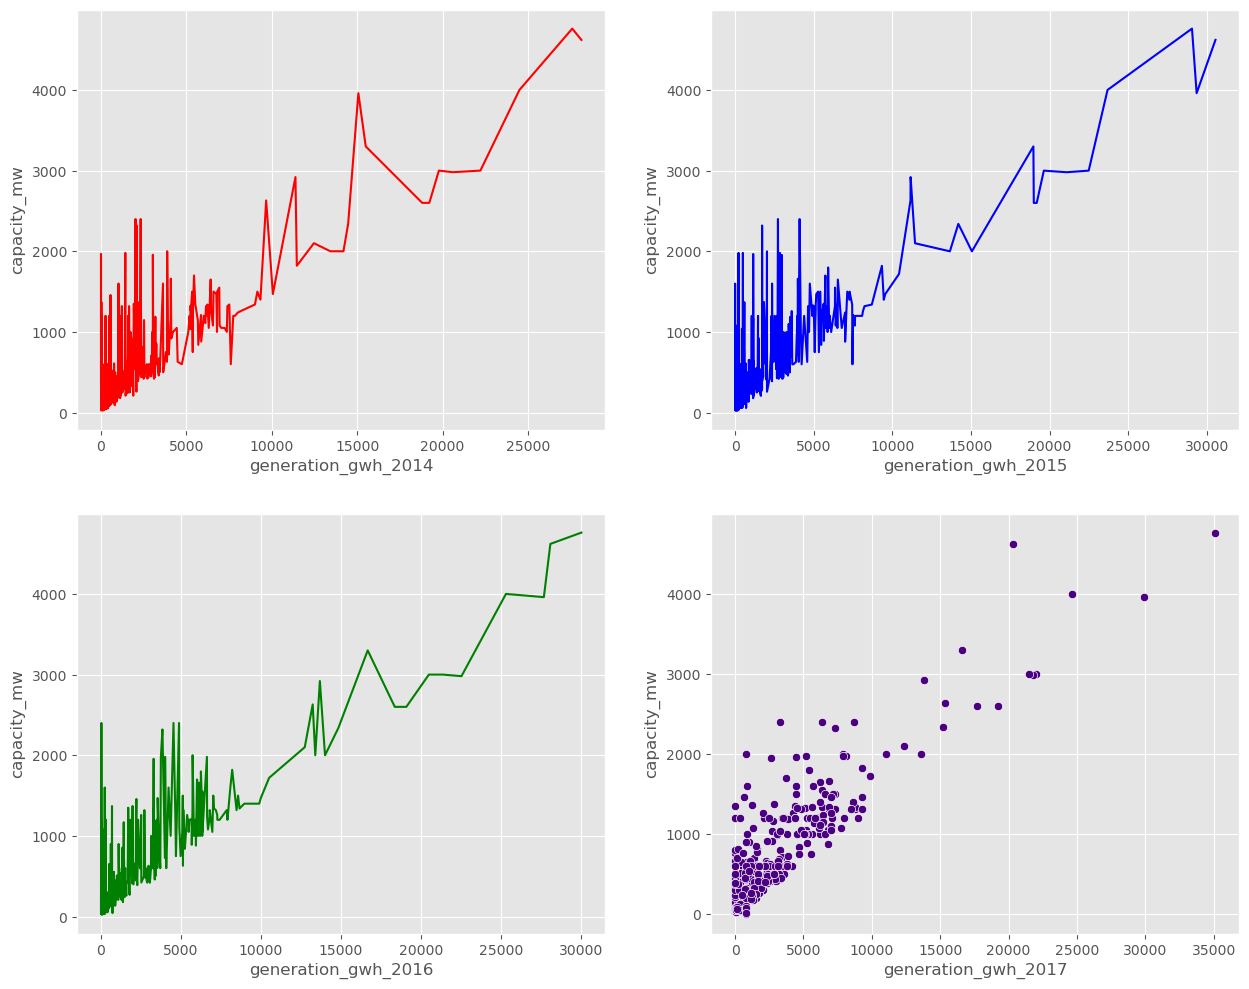

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color='r')
#checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color='b')
#checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color='g')
#checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color='indigo')
plt.show()

obsevation:
    
    - There is positive liner relationship between the capacity and the electricity generation reported for the years mentioned.
    
    - The plot shows how the electricity generation reported for the years 2014, 2015, 2016, 2017 have high capacity of above         1000mw. Also power generation growth is more than 5000gwh in all the years.
  
     - As the electricity generation growth increases, the capacity of plant is also increasing moderately.

# Comparing the target variable Fuel Types with other features

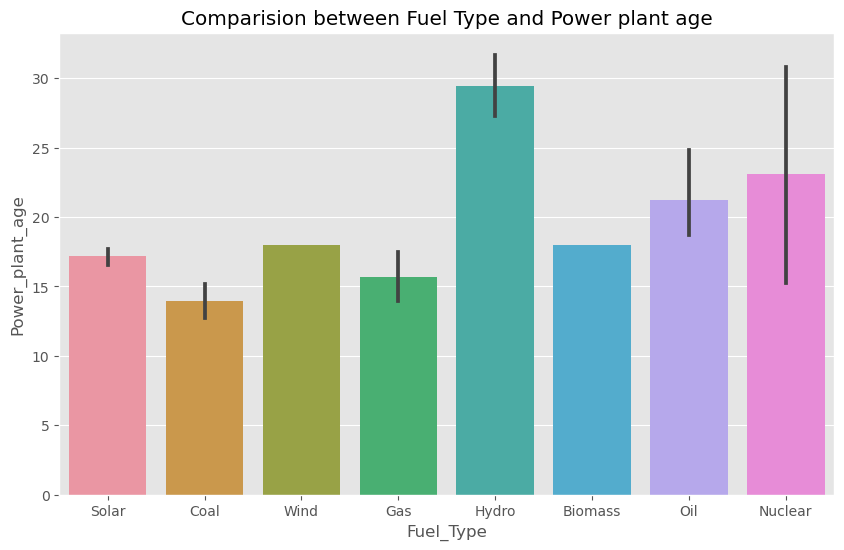

In [50]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize=(10,6))
plt.title('Comparision between Fuel Type and Power plant age')
sns.barplot(x='Fuel_Type',y='Power_plant_age',data=df)
plt.show()

From the above cell we can see most of the power plants uses Hydro to generate the electricity followed by Nuclear and oil.
The power plants which are recently constructed uses Solor,Coal and Gas to generate the power.

<Axes: title={'center': 'Comparision between Latitude and Fuel_Type'}, xlabel='Fuel_Type', ylabel='latitude'>

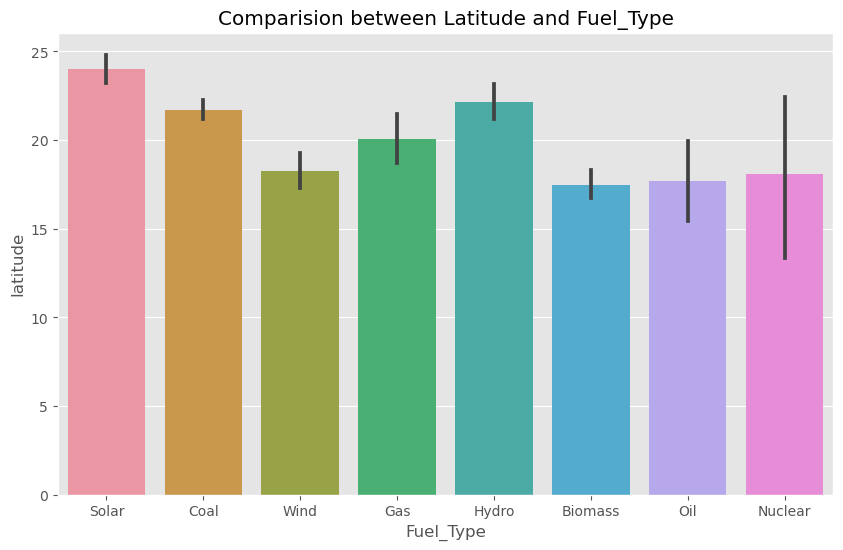

In [51]:
#Let's check how the fuel types is related to latitude of the power plant
plt.figure(figsize=(10,6))
plt.title('Comparision between Latitude and Fuel_Type')
sns.barplot(x='Fuel_Type',y='latitude',data=df)

We can observe that the fuel type solar has high latitude of above 20 followed by Hydro, Coal and Gas. Apart from these types others have less latitude.

<Axes: title={'center': 'Comparision between longitude and Fuel Type'}, xlabel='Fuel_Type', ylabel='longitude'>

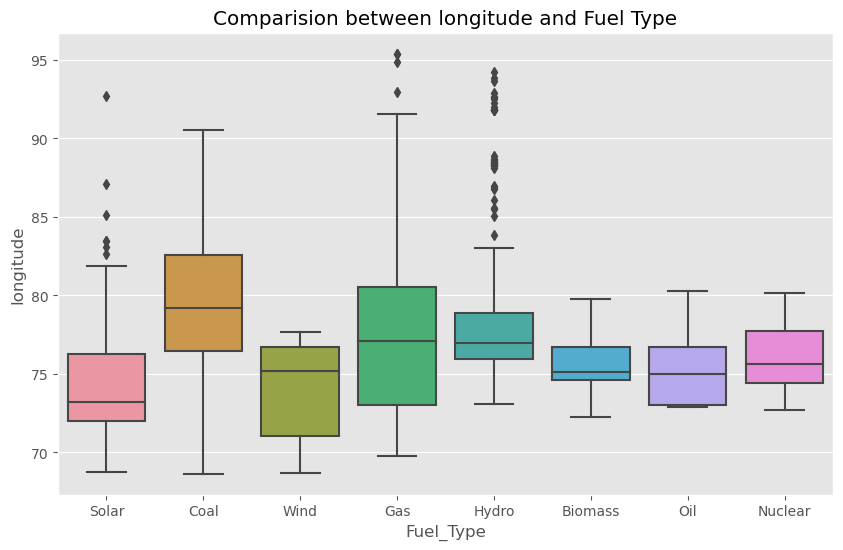

In [52]:
#Let's check how the fuel is related to longitude of the power plant
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.title('Comparision between longitude and Fuel Type')
sns.boxplot(x='Fuel_Type',y='longitude',data=df)

The fuel type gas has high longitude followed by Hydro, Solar and Coal other fuel types have very less longitude.

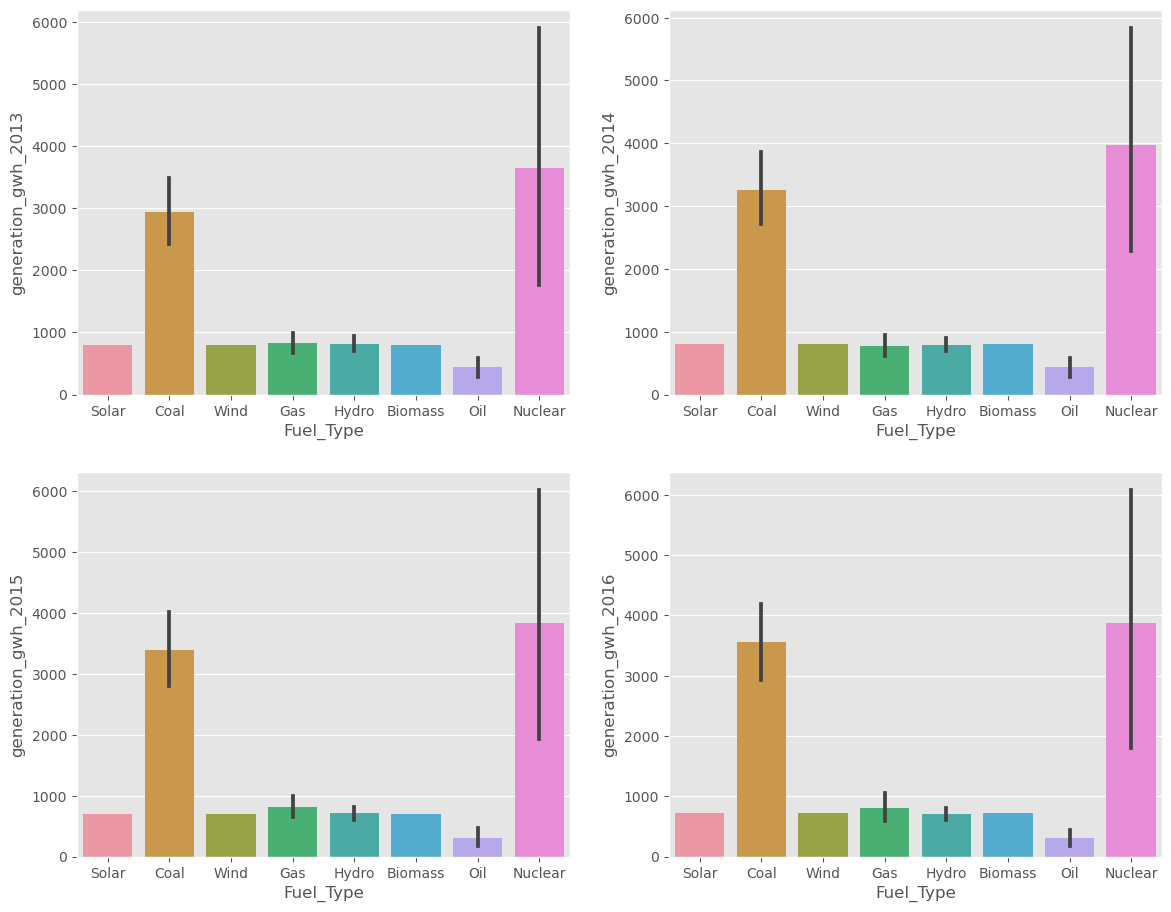

In [53]:
fig,axes=plt.subplots(2,2,figsize=(14,11))

#Checking attrition level in Dailyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2013',ax=axes[0,0],data=df)
#Checking attrition level in hourlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,1],data=df)
#Checking attrition level in Monthlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[1,0],data=df)
#checking attrition level in Monthlyincome
sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,1],data=df)
plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by coal.
Other fuel types have very less power generation reports.

# Checking the relation between targets

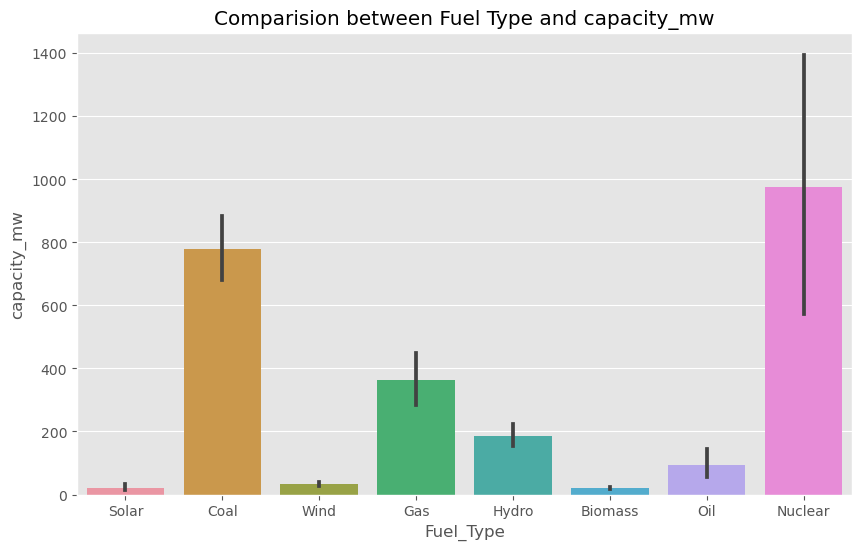

In [54]:
#Let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(10,6))
plt.title('Comparision between Fuel Type and capacity_mw')
sns.barplot(x='Fuel_Type',y='capacity_mw',data=df)
plt.show()

- The plot shows that the capacity of generating electricity in high in Nuclear followed by Coal.
- Also the electricity generating capacity in very less in Solor, Wind, Biomass and other plants.

# Multivariate Analysis

Since we have 2 targets variables capacity_mw and Fuel_Type will check the pairwise relation for the features with both the targets separately.

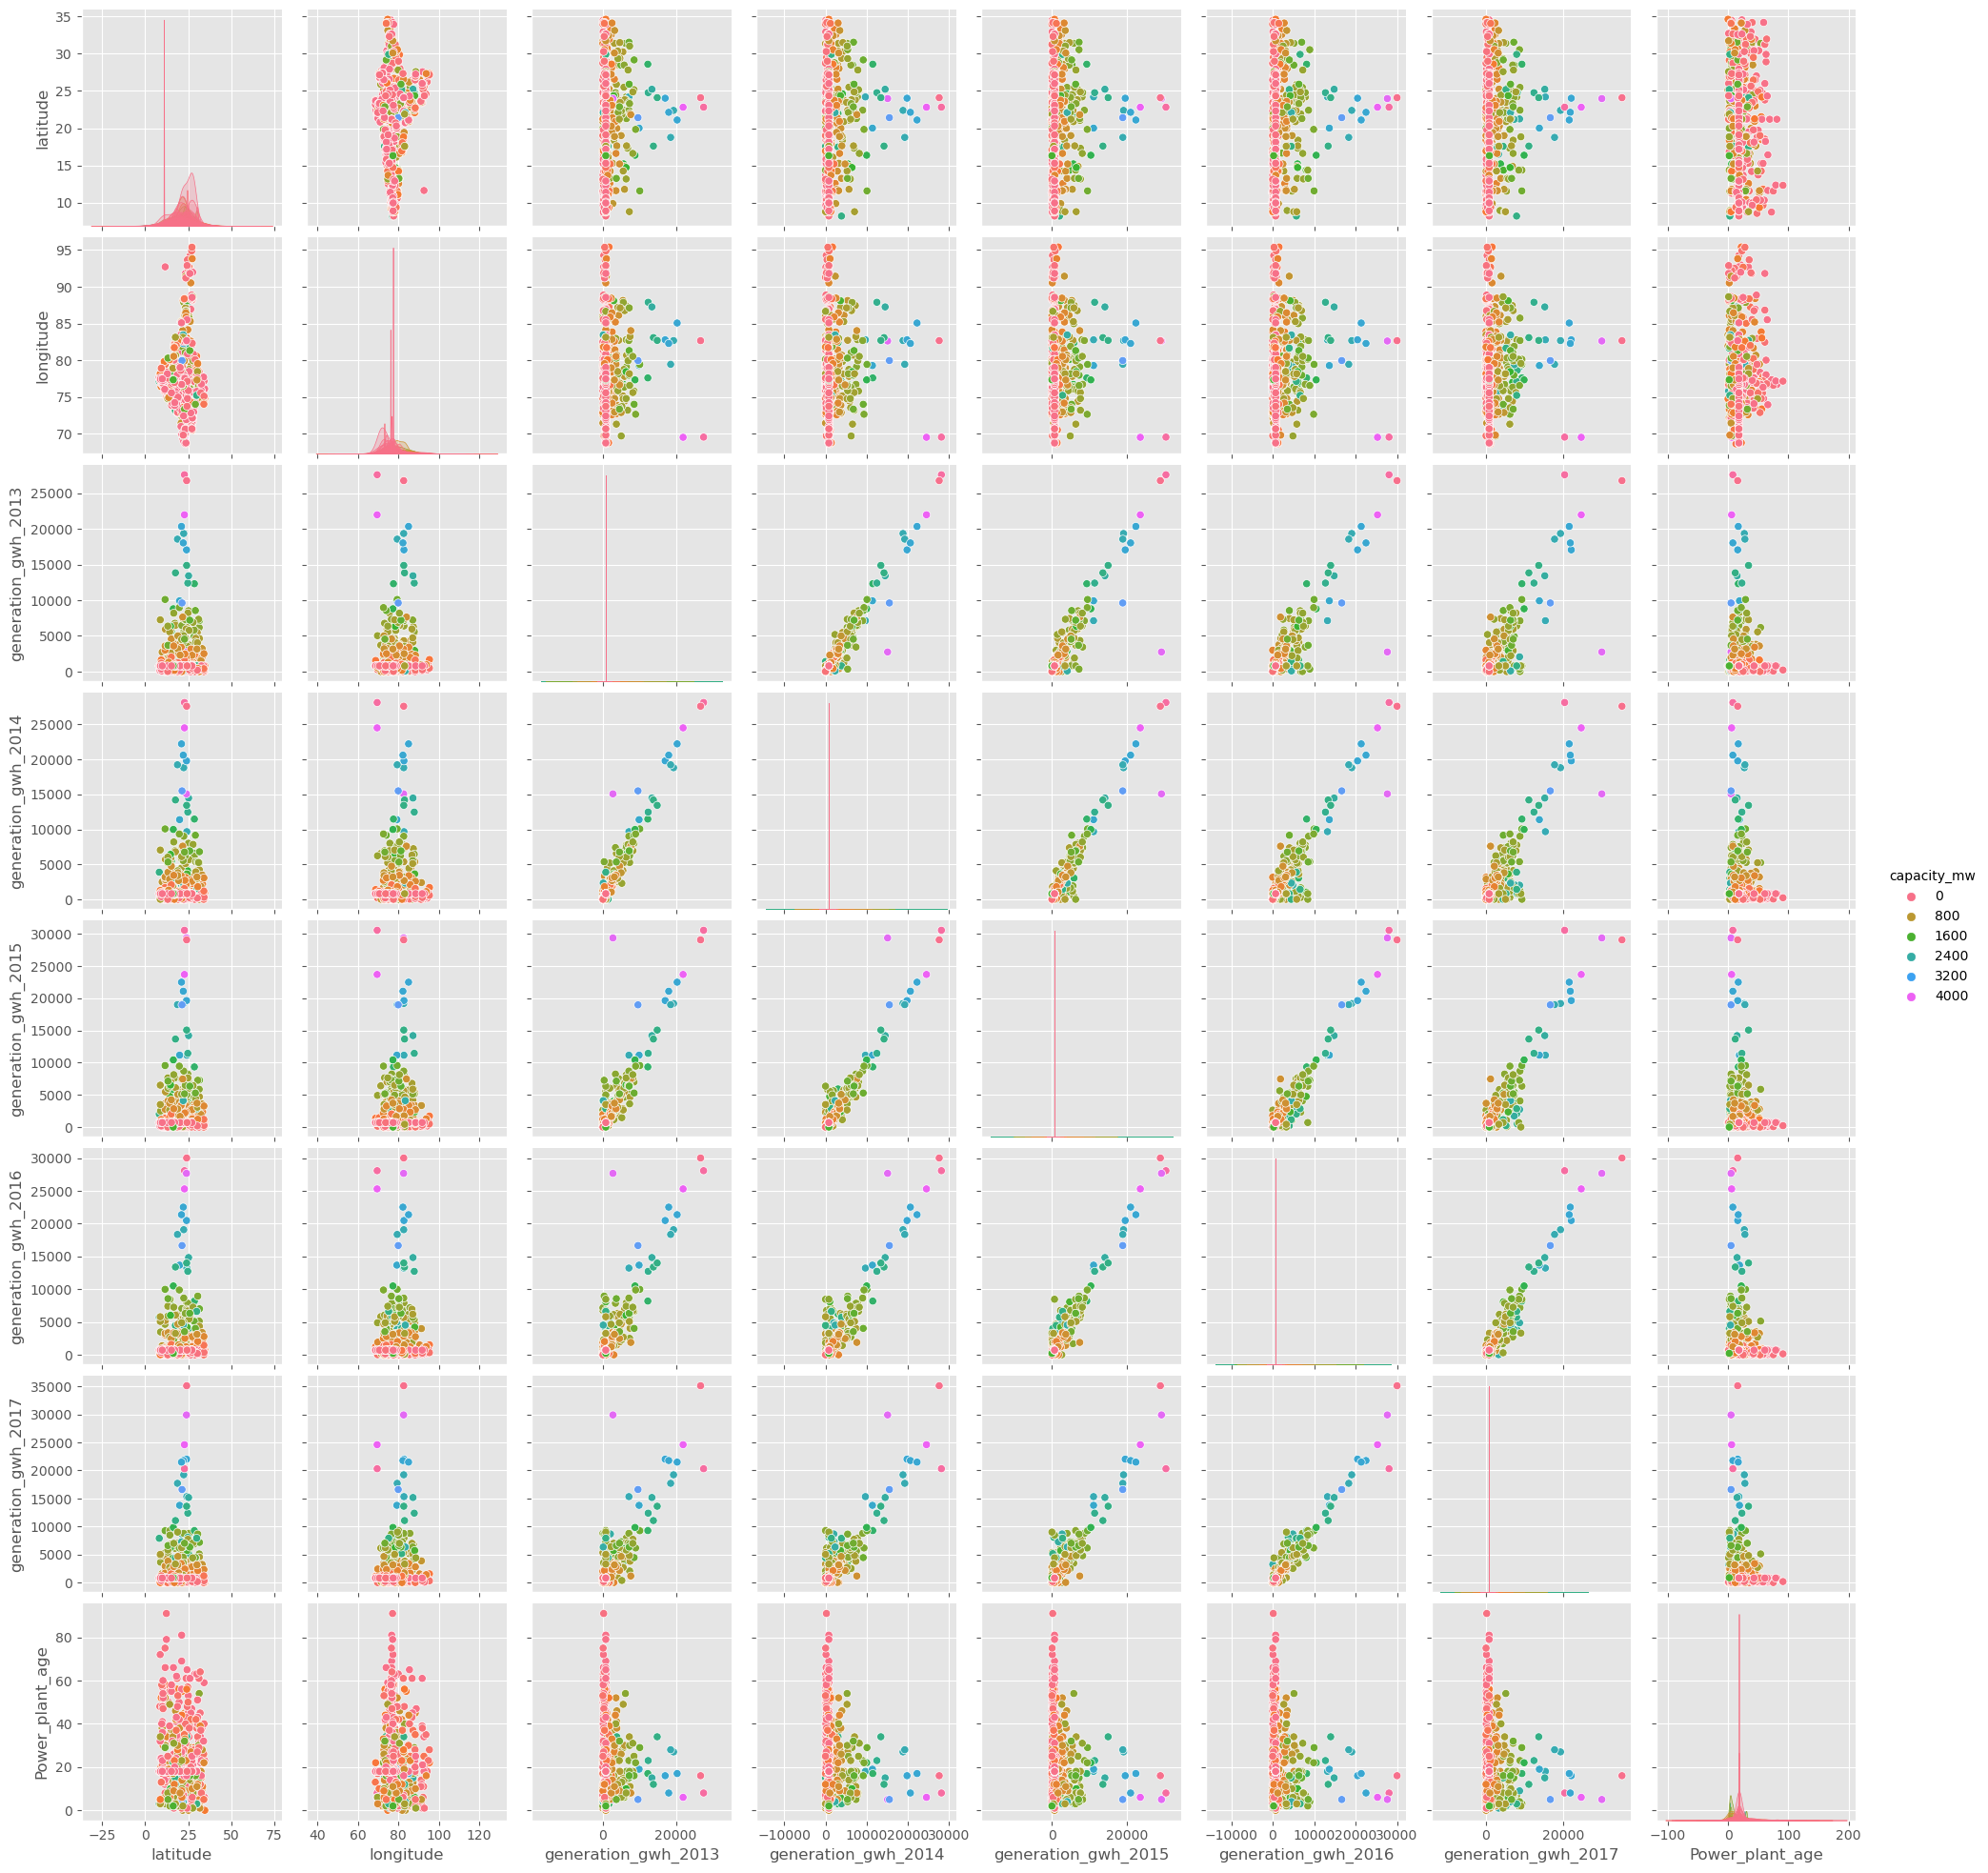

In [55]:
#checking the pairwise relation between the features and label capacity in magewatt.
sns.pairplot(df,hue='capacity_mw',palette='husl')

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'capacity_mw'.Here we can observe the relation between the features and label.
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can also observe the outliers in some of the columns.

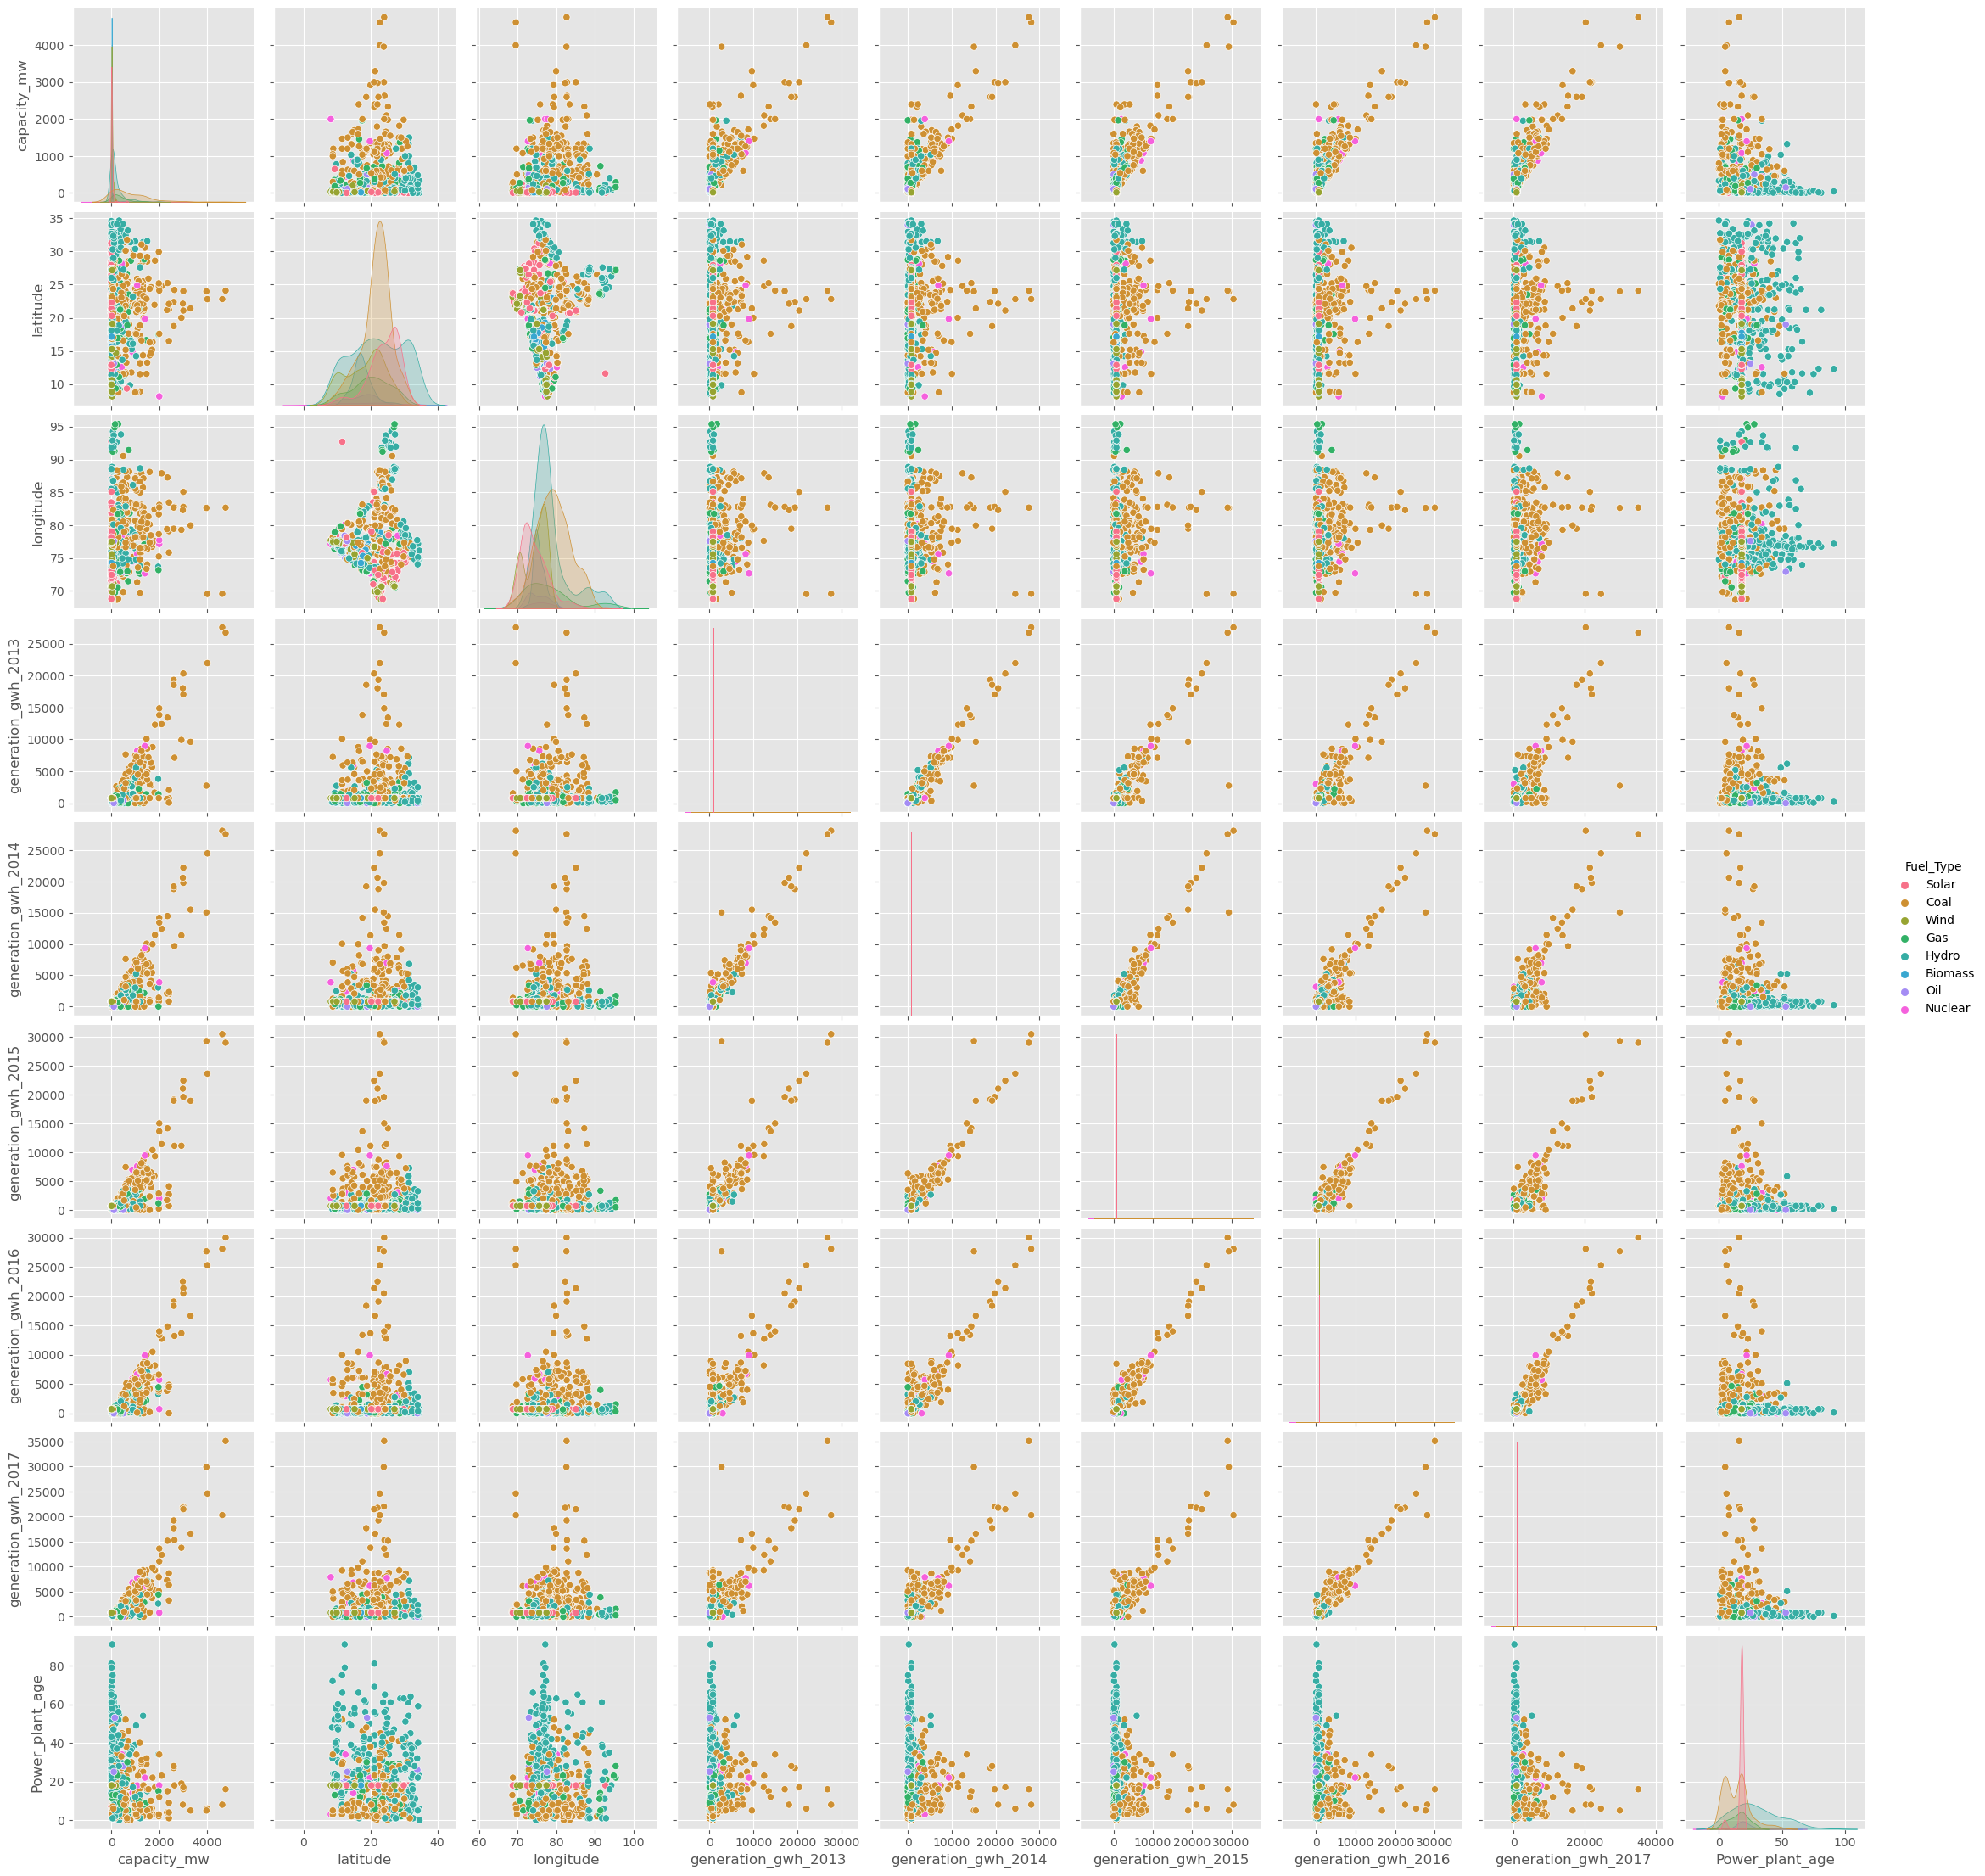

In [56]:
#Checking the pairwise relation between the features and label Fuel_Type
sns.pairplot(df,hue='Fuel_Type',palette='husl')

- This pair plot gives the pairwise relations of the features on the bases of target variable 'Fuel_Type' and we can notice most of the features are highly correlated with each other.
- Most of the columns have strong linear relationship also there are huge outliers present in the columns. So will remove these outliers in the later part.

# Outliers Handling

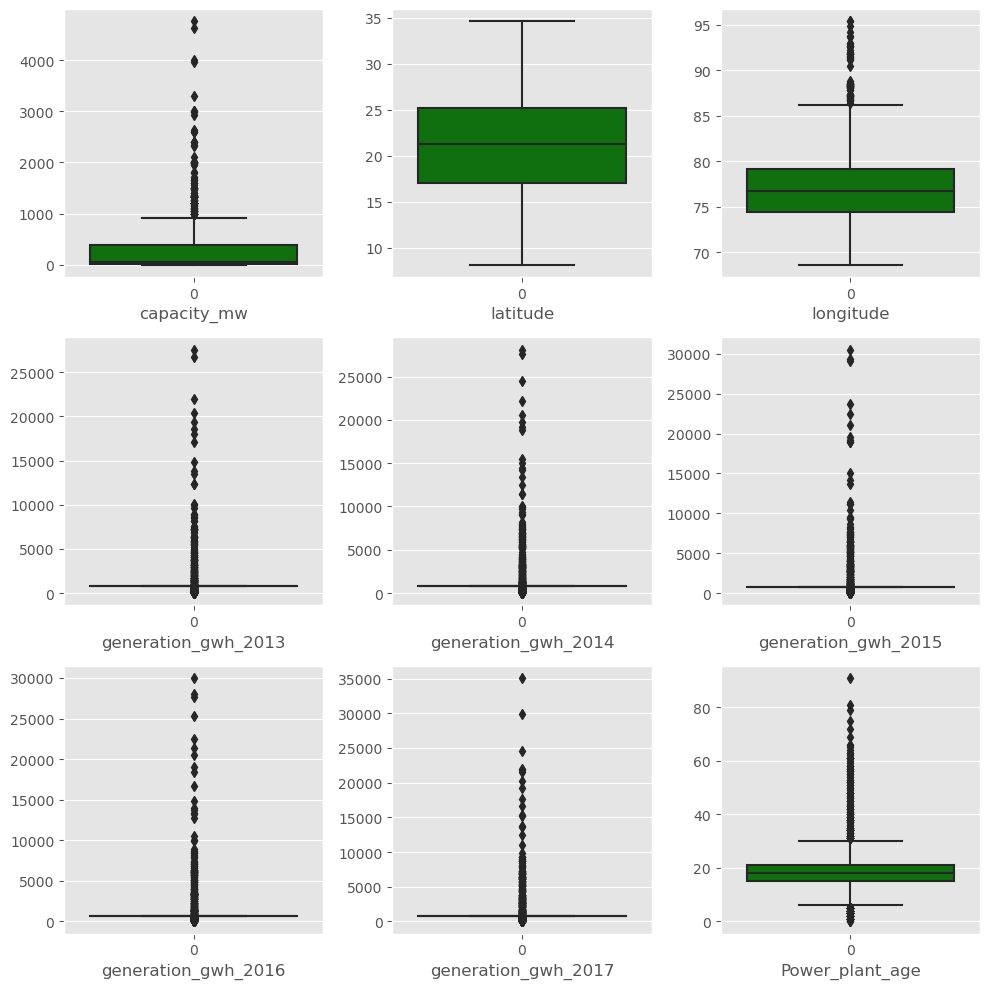

In [57]:
#Identifying the outliers present in numerical columns using boxplot
plt.figure (figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- In the boxplot we can noticce the outliers present in all columns except latitude. Even target columns has outliers but no need  to remove it.
- Let's remove outliers using ZSCORE method.

# Rmoving Outliers

# Zscore method

In [58]:
#features contaning outliers
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [59]:
#using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

longitude  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0     0.872209             0.247545             0.256321             0.268736   
1     0.586027             0.247545             0.256321             0.268736   
2     1.681100             0.247545             0.256321             0.268736   
3     2.917501             0.311744             0.323889             0.220902   
4     1.045370             0.090853             0.545202             1.479248   
..         ...                  ...                  ...                  ...   
903   0.011323             0.247545             0.256321             0.503361   
904   0.157797             0.247545             0.256321             0.268736   
905   0.382712             0.247545             0.256321             0.268736   
906   0.766169             0.247545             0.256321             0.268736   
907   0.013775             0.247545             0.256321             0.268736   

     generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0               0.278209             0.276171         0.979918  
1               0.278209             0.276171         0.138857  
2               0.278209             0.276171         0.138857  
3               0.221881             0.323391         0.444698  
4               1.560680             1.226826         1.285758  
..                   ...                  ...              ...  
903             0.438972             0.257195         1.362218  
904             0.278209             0.276171         0.138857  
905             0.278209             0.276171         0.138857  
906             0.278209             0.276171         0.138857  
907             0.278209             0.276171         0.138857  

[908 rows x 7 columns]

- so here we have removed the outliers

In [60]:
# creating new dataframe

new_df=df[(z<3).all(axis=1)]
new_df

capacity_mw  latitude  longitude Fuel_Type other_fuel1  \
0            2.5   28.1839    73.2407     Solar         Oil   
1           98.0   24.7663    74.6090      Coal         Oil   
2           39.2   21.9038    69.3732      Wind         Oil   
3          135.0   23.8712    91.3602       Gas         Oil   
4         1800.0   21.9603    82.4091      Coal         Oil   
..           ...       ...        ...       ...         ...   
903       1600.0   16.2949    77.3568      Coal         Oil   
904          3.0   12.8932    78.1654     Solar         Oil   
905         25.5   15.2758    75.5811      Wind         Oil   
906         80.0   24.3500    73.7477      Coal         Oil   
907         16.5    9.9344    77.4768      Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
903         Central Electricity Authority   
904   Karnataka Power Corporation Limited   
905                                   CDM   
906                    Hindustan Zinc ltd   
907                                   CDM   

                       geolocation_source  generation_gwh_2013  \
0    National Renewable Energy Laboratory           797.063475   
1                                     WRI           797.063475   
2                                     WRI           797.063475   
3                                     WRI           631.777928   
4                                     WRI          1668.290000   
..                                    ...                  ...   
903                                   WRI           797.063475   
904                        Industry About           797.063475   
905                                   WRI           797.063475   
906                                   WRI           797.063475   
907                                   WRI           797.063475   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             805.760000           701.027250           716.728350   
1             805.760000           701.027250           716.728350   
2             805.760000           701.027250           716.728350   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903           805.760000             0.994875           233.596650   
904           805.760000           701.027250           716.728350   
905           805.760000           701.027250           716.728350   
906           805.760000           701.027250           716.728350   
907           805.760000           701.027250           716.728350   

     generation_gwh_2017  Power_plant_age  
0             807.601700              7.0  
1             807.601700             18.0  
2             807.601700             18.0  
3             663.774500             14.0  
4            5385.579736              3.0  
..                   ...              ...  
903           865.400000              2.0  
904           807.601700             18.0  
905           807.601700             18.0  
906           807.601700             18.0  
907           807.601700             18.0  

[852 rows x 13 columns]

- We can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [61]:
df.shape

(908, 13)

- Before removing outliers we had 908 rows and 13 columns in the dataset.

In [62]:
new_df.shape

(852, 13)

- After removing the outliers we have 852 rows and 13 columns in the dataset.

In [63]:
#checking the data loss
data_loss = (908-852)/908*100
data_loss

6.167400881057269

- Here we are losing the 6% of data by removing outliers using zscore. Then remove the outliers and check data loss % by using IQR method.

# IQR Method(Inter Quantile Method)

In [64]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

Q1 = Q1.reindex(df.columns)
Q3 = Q3.reindex(df.columns)
#IQR
IQR =Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
df1.shape

(422, 13)

- So we can notice here that after using IQR method data have 422 rows and 13 columns.

In [66]:
#Let's check the dataloss
data_loss = (908-422)/908*100
data_loss

53.524229074889874

- We can observe here that using IQR method we are lossing 53% of data which is huge so considering zscore method for better result.

# Encoding the categorical columns using Label Encoding

In [67]:
categorical_col = ['Fuel_Type','other_fuel1','source','geolocation_source']

In [68]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

- So here encoding the categorical columns using label encoder.

In [69]:
new_df[categorical_col]

Fuel_Type  other_fuel1  source  geolocation_source
0            6            2     109                   1
1            1            2     174                   2
2            7            2      21                   2
3            2            2      22                   2
4            1            2      22                   2
..         ...          ...     ...                 ...
903          1            2      22                   2
904          6            2      77                   0
905          7            2      21                   2
906          1            2      59                   2
907          7            2      21                   2

[852 rows x 4 columns]

- Now we have encoded the categorical columns using label encoding method.

# Correlation between the target variable and features using Heat Map

In [70]:
cor = new_df.corr()
cor

capacity_mw  latitude  longitude  Fuel_Type  other_fuel1  \
capacity_mw             1.000000  0.047883   0.269970  -0.398618    -0.002132   
latitude                0.047883  1.000000  -0.025155  -0.006130     0.036941   
longitude               0.269970 -0.025155   1.000000  -0.388568     0.029138   
Fuel_Type              -0.398618 -0.006130  -0.388568   1.000000     0.006390   
other_fuel1            -0.002132  0.036941   0.029138   0.006390     1.000000   
source                 -0.277952  0.068515  -0.234616   0.039078     0.028433   
geolocation_source      0.236602 -0.201910   0.264391  -0.478338    -0.022798   
generation_gwh_2013     0.575972  0.074709   0.122737  -0.232343     0.001675   
generation_gwh_2014     0.627406  0.082205   0.126913  -0.250540    -0.000346   
generation_gwh_2015     0.685477  0.071786   0.163771  -0.277754     0.005892   
generation_gwh_2016     0.761222  0.057760   0.207339  -0.290226     0.015135   
generation_gwh_2017     0.800618  0.070934   0.209047  -0.291655     0.011855   
Power_plant_age        -0.248690 -0.084720  -0.107977   0.087476    -0.055179   

                       source  geolocation_source  generation_gwh_2013  \
capacity_mw         -0.277952            0.236602             0.575972   
latitude             0.068515           -0.201910             0.074709   
longitude           -0.234616            0.264391             0.122737   
Fuel_Type            0.039078           -0.478338            -0.232343   
other_fuel1          0.028433           -0.022798             0.001675   
source               1.000000           -0.498012            -0.135116   
geolocation_source  -0.498012            1.000000             0.108337   
generation_gwh_2013 -0.135116            0.108337             1.000000   
generation_gwh_2014 -0.141641            0.113568             0.944730   
generation_gwh_2015 -0.157690            0.126437             0.845955   
generation_gwh_2016 -0.161786            0.129721             0.730317   
generation_gwh_2017 -0.158162            0.126815             0.660801   
Power_plant_age     -0.056455            0.035803            -0.012797   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.627406             0.685477   
latitude                        0.082205             0.071786   
longitude                       0.126913             0.163771   
Fuel_Type                      -0.250540            -0.277754   
other_fuel1                    -0.000346             0.005892   
source                         -0.141641            -0.157690   
geolocation_source              0.113568             0.126437   
generation_gwh_2013             0.944730             0.845955   
generation_gwh_2014             1.000000             0.911892   
generation_gwh_2015             0.911892             1.000000   
generation_gwh_2016             0.800808             0.907462   
generation_gwh_2017             0.742744             0.826148   
Power_plant_age                -0.069265            -0.141499   

                     generation_gwh_2016  generation_gwh_2017  Power_plant_age  
capacity_mw                     0.761222             0.800618        -0.248690  
latitude                        0.057760             0.070934        -0.084720  
longitude                       0.207339             0.209047        -0.107977  
Fuel_Type                      -0.290226            -0.291655         0.087476  
other_fuel1                     0.015135             0.011855        -0.055179  
source                         -0.161786            -0.158162        -0.056455  
geolocation_source              0.129721             0.126815         0.035803  
generation_gwh_2013             0.730317             0.660801        -0.012797  
generation_gwh_2014             0.800808             0.742744        -0.069265  
generation_gwh_2015             0.907462             0.826148        -0.141499  
generation_gwh_2016             1.000000       

-  The gives the correlation between the dependent and independent variables.We can visualize this by plotting heat map.

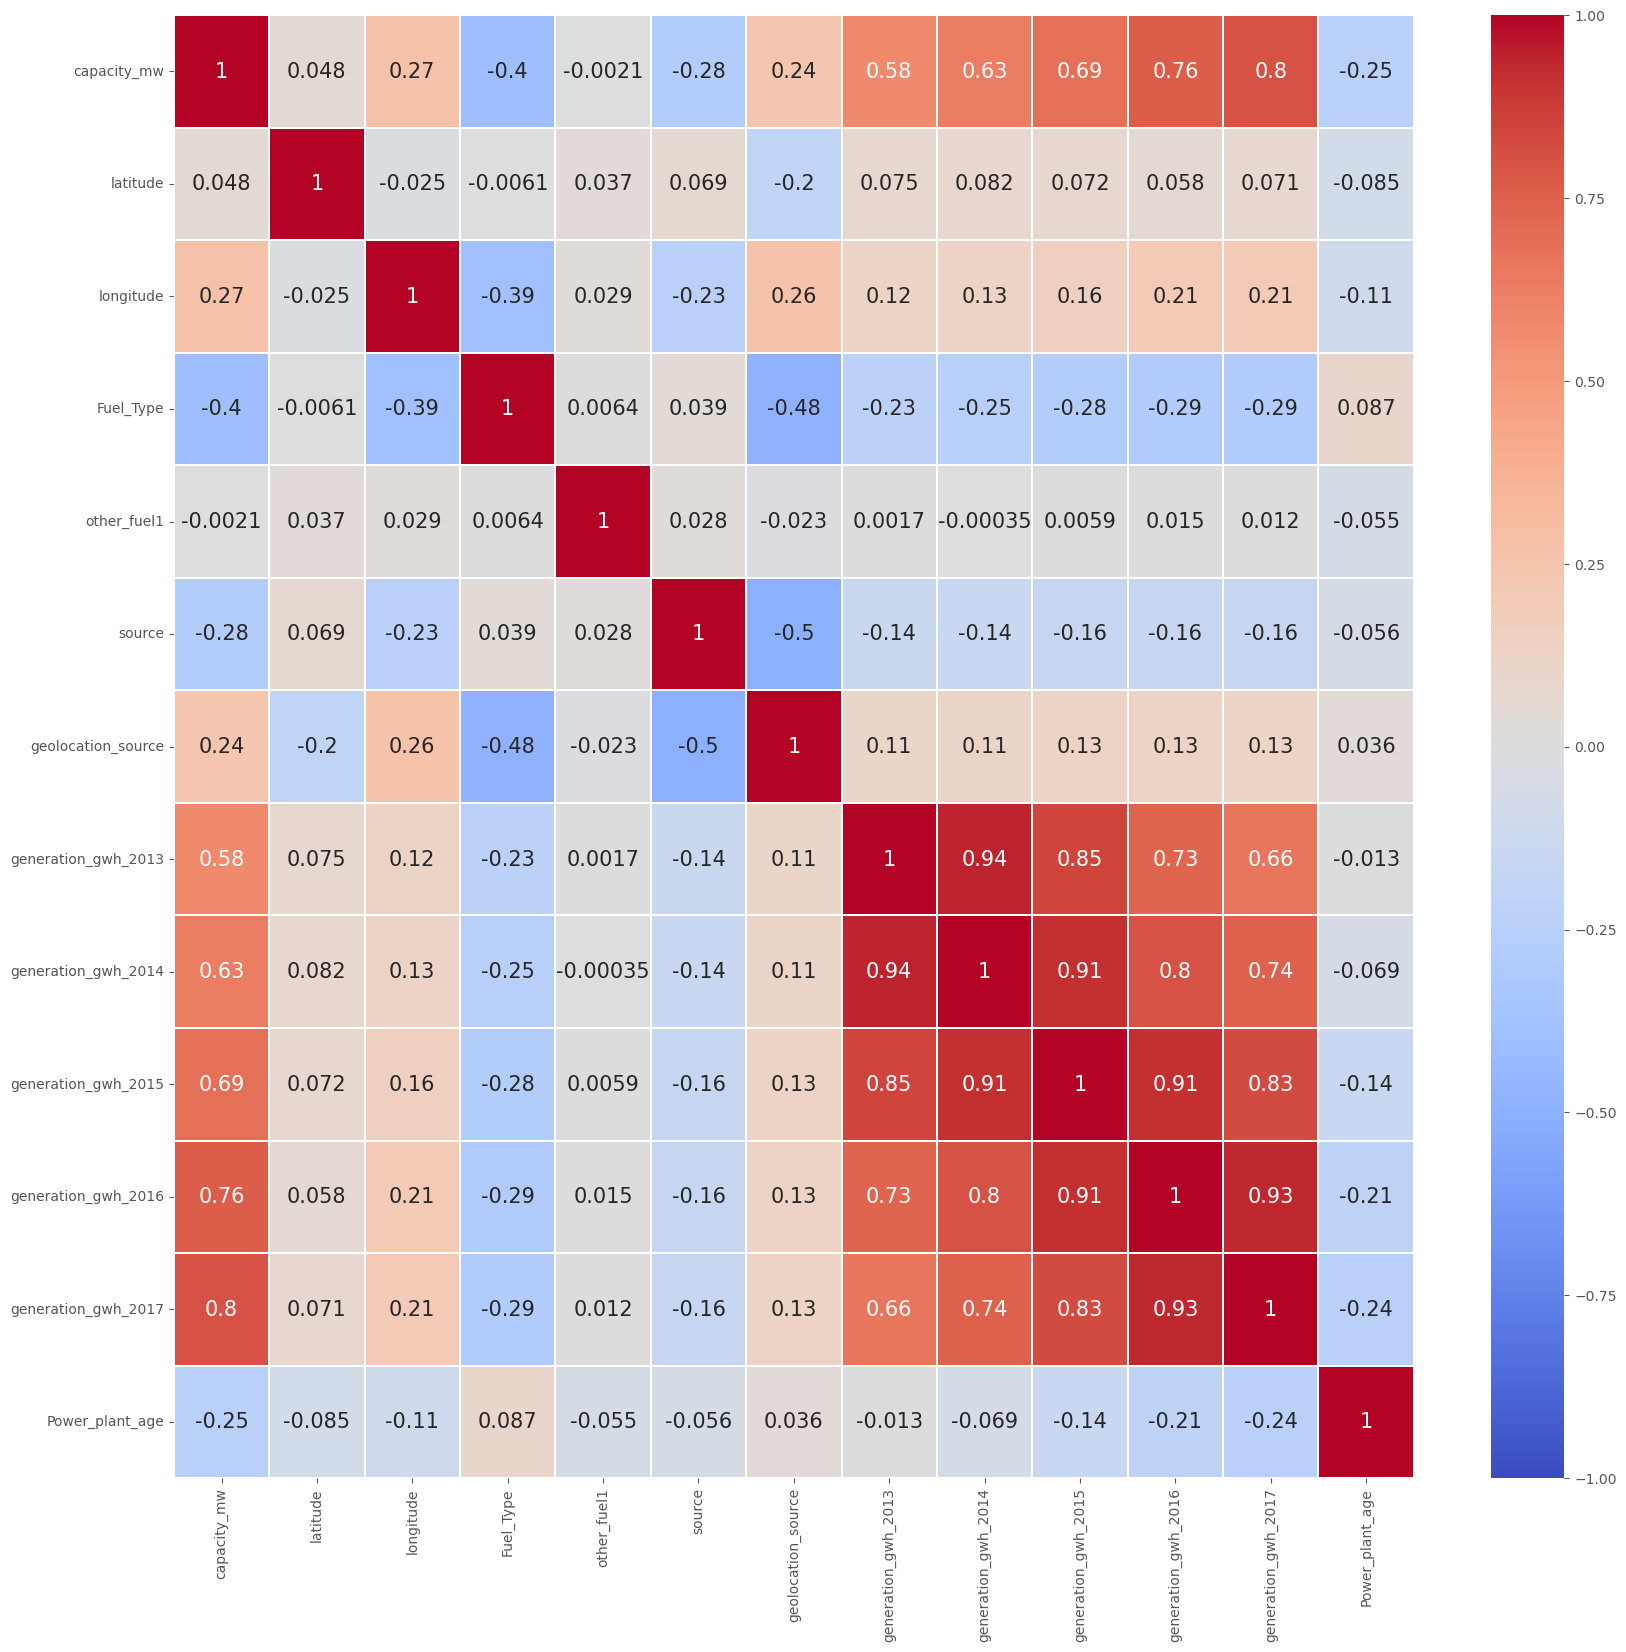

In [71]:
#visualzing the correlation matrix by plotting heat map
plt.figure(figsize=(20,19))
sns.heatmap(new_df.corr(), 
            linewidths=.1, 
            vmin=-1, 
            vmax=1, 
            fmt='.2g', 
            annot=True, 
            linecolor='white', 
            annot_kws={'size': 15}, 
            cmap='coolwarm')
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data.
- We can observe the relation between feature to feature and feature to label.
- This heat map contains both positive and negative correlation.

Correlation between capacity_mw and features
- The label capacity_mw is highly positivety correlated with the features generation_gwh_2017, generation_gwh_2016,generation_gwh_2015, generation _gwh_2014, generation_gwh_2013.
- The label is negatively correlated with the features Fuel_Type, source and Power_Plant _age.
- The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

Correlation between Fuel_Type and features 
- The label Fuel_Type is less correlated with Power_plant_age and source
- The label is negatively correlated with geoloacation_source,longitude,capacity_mw and all generation_gwh years.
- From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by checking VIF value befor buliding our models.
- Also the features other_fuel1 and latitude have very less correlation with both the labels. Let's drop those columns.


# Visualizing the correlation between label and features using bar plot

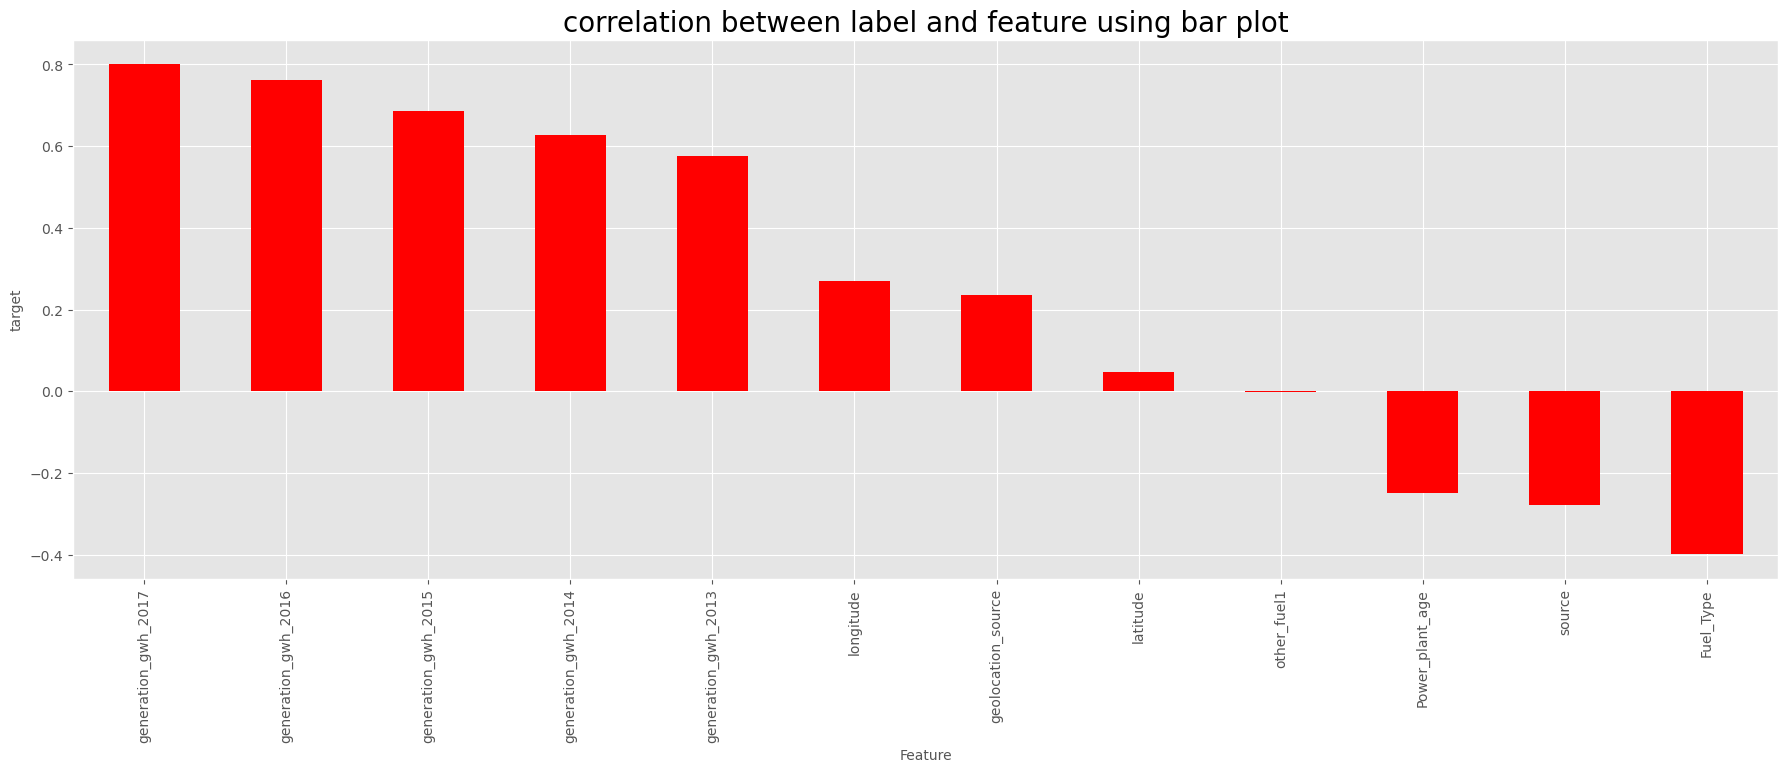

In [72]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

- This is the bar to check the correlation between capacity_mw and features. Here we can easily notice the positive and negative correlation between the features and the label.

# Visualizing the correlation between label and features using bar plot

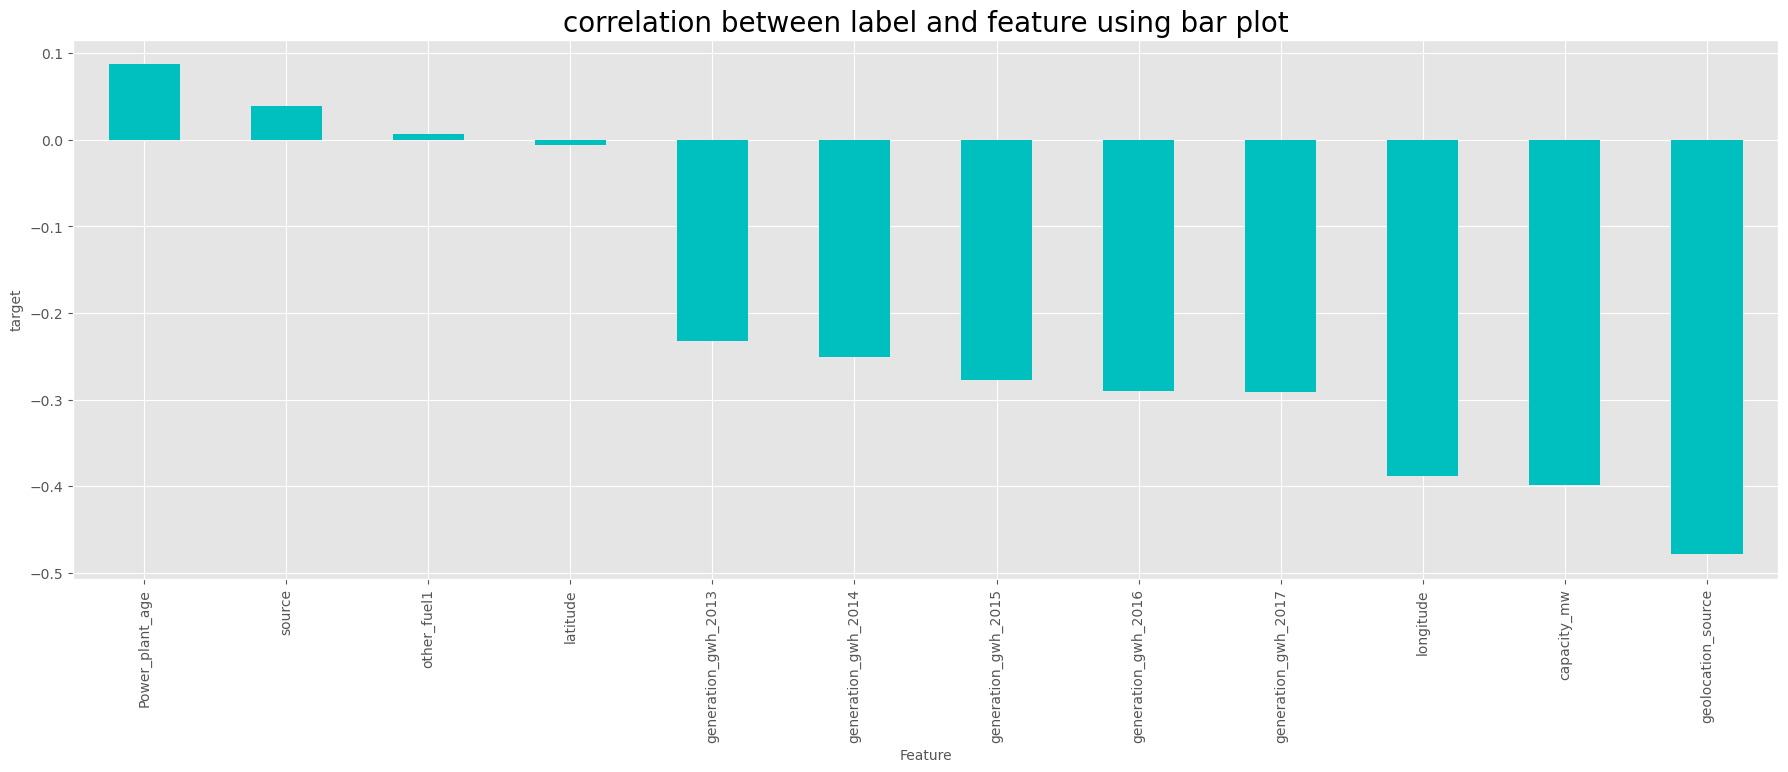

In [73]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

- This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the postive and negative correlation between the feature and the label.
- From both the bar plot we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type let's drop those columns.

In [74]:
#dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [75]:
new_df.head()

capacity_mw  longitude  Fuel_Type  source  geolocation_source  \
0          2.5    73.2407          6     109                   1   
1         98.0    74.6090          1     174                   2   
2         39.2    69.3732          7      21                   2   
3        135.0    91.3602          2      22                   2   
4       1800.0    82.4091          1      22                   2   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0           716.728350           807.601700              7.0  
1           716.728350           807.601700             18.0  
2           716.728350           807.601700             18.0  
3           886.004428           663.774500             14.0  
4          6243.000000          5385.579736              3.0

- Here is the new data frame after removing unnecessary columns.

# 1. Predicition for capacity_mw

# Separating the features and label variables into x and y

In [76]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [77]:
x.shape

(852, 10)

In [78]:
y.shape

(852,)

- So here we can see the dmension of x and y

# Checking for Skewness

In [79]:
x.skew()

longitude              0.888694
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

The following columns have skewness more than +/-0.5
- longitude 
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- Power_plant_age

- Also the columns - source and geolocation_source are categorical so no need to remove skewness in these columns.

# Removing Skewness using yeo_johnson method

In [80]:
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [81]:
x[skew]=scaler.fit_transform(x[skew].values)
x[skew].head()

longitude  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0  -0.924039            -0.044354            -0.045943            -0.052896   
1  -0.500630            -0.044354            -0.045943            -0.052896   
2  -2.373612            -0.044354            -0.045943            -0.052896   
3   2.492970            -0.259129            -0.276296             0.101229   
4   1.285220             0.743909             1.423753             2.285309   

   generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0            -0.054610            -0.039236        -1.138596  
1            -0.054610            -0.039236         0.078356  
2            -0.054610            -0.039236         0.078356  
3             0.118902            -0.192428        -0.306973  
4             2.271019             1.972415        -1.802274

In [82]:
#Checking skewness after using yeo-johnson method
x.skew()

longitude              0.000077
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Power_plant_age        0.037747
dtype: float64

- Here successfully removed the skewness from all the numerical columns using yeo-johnson method.

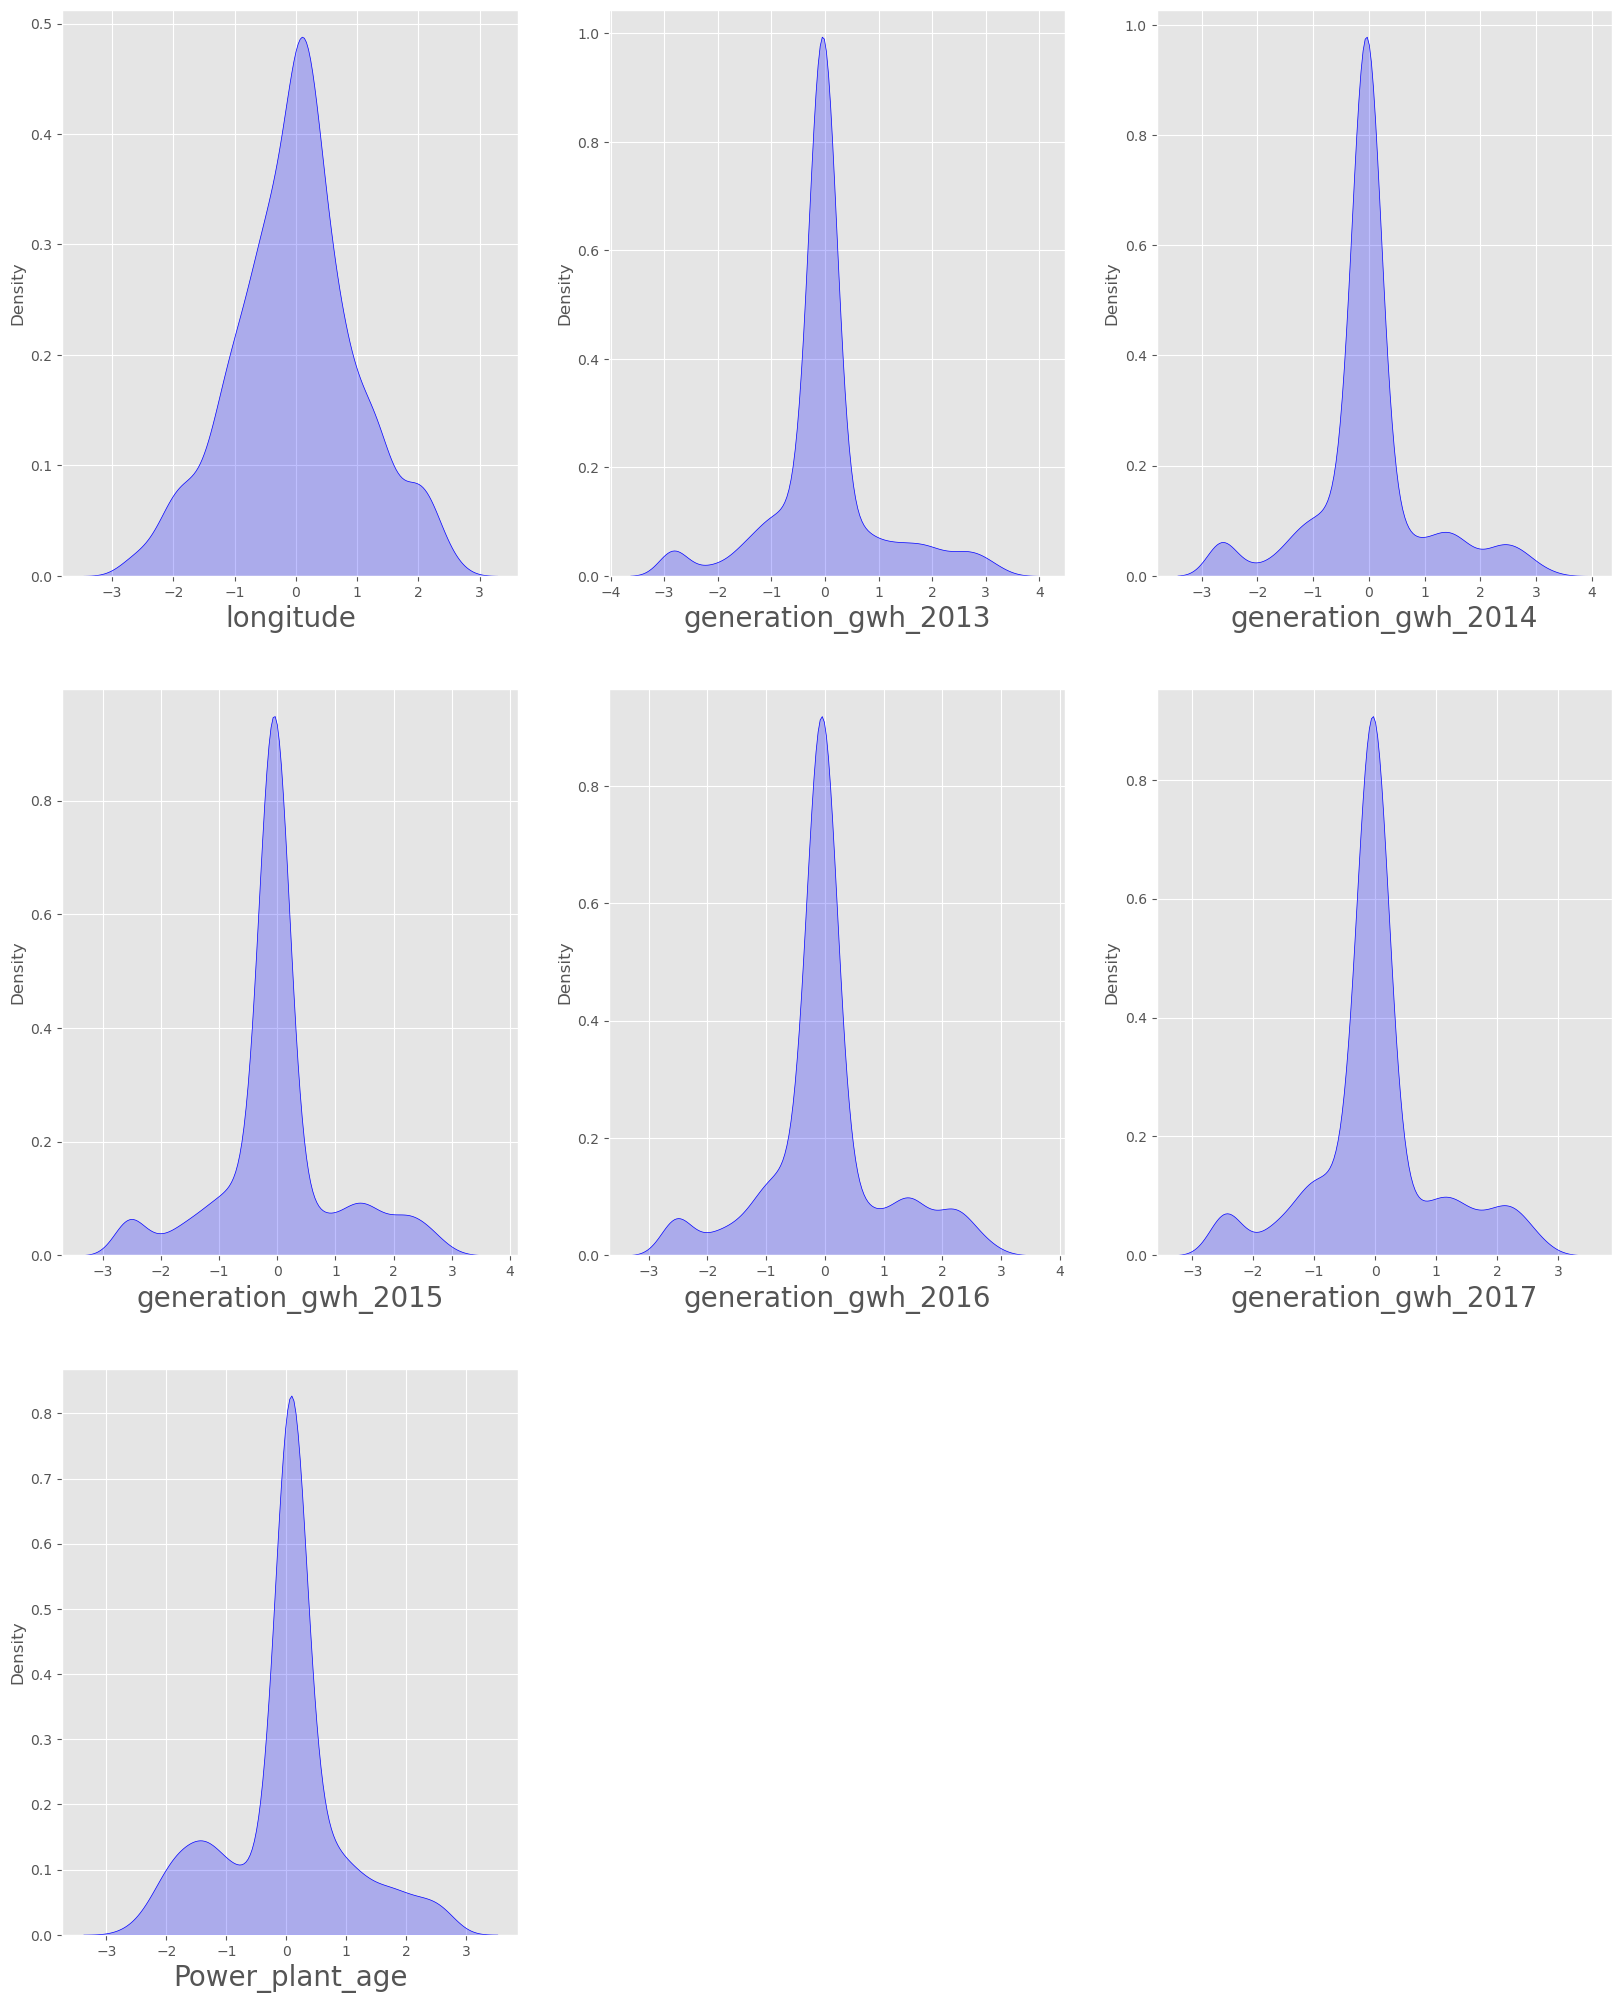

In [83]:
#checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color= 'b', kde_kws = {'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The data is not normal but the skewness has been reduced in all the columns

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

longitude  Fuel_Type    source  geolocation_source  generation_gwh_2013  \
0    -0.924039   1.175664  1.399156           -1.037509            -0.044354   
1    -0.500630  -0.973833  2.823623            0.406866            -0.044354   
2    -2.373612   1.605563 -0.529352            0.406866            -0.044354   
3     2.492970  -0.543934 -0.507437            0.406866            -0.259129   
4     1.285220  -0.973833 -0.507437            0.406866             0.743909   
..         ...        ...       ...                 ...                  ...   
847   0.237064  -0.973833 -0.507437            0.406866            -0.044354   
848   0.429134   1.175664  0.697881           -2.481884            -0.044354   
849  -0.223563   1.605563 -0.529352            0.406866            -0.044354   
850  -0.762359  -0.973833  0.303413            0.406866            -0.044354   
851   0.266233   1.605563 -0.529352            0.406866            -0.044354   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.045943            -0.052896            -0.054610   
1              -0.045943            -0.052896            -0.054610   
2              -0.045943            -0.052896            -0.054610   
3              -0.276296             0.101229             0.118902   
4               1.423753             2.285309             2.271019   
..                   ...                  ...                  ...   
847            -0.045943            -2.448545            -0.825789   
848            -0.045943            -0.052896            -0.054610   
849            -0.045943            -0.052896            -0.054610   
850            -0.045943            -0.052896            -0.054610   
851            -0.045943            -0.052896            -0.054610   

     generation_gwh_2017  Power_plant_age  
0              -0.039236        -1.138596  
1              -0.039236         0.078356  
2              -0.039236         0.078356  
3              -0.192428        -0.306973  
4               1.972415        -1.802274  
..                   ...              ...  
847             0.016799        -2.017970  
848            -0.039236         0.078356  
849            -0.039236         0.078356  
850            -0.039236         0.078356  
851            -0.039236         0.078356  

[852 rows x 10 columns]

- So here scaled the data using standard scalarization method to overcome with the issue of data biasness.
- As we have obeserved in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF (Variance Inflation Factor) Values

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range (len(x.columns))]
vif['features'] = x.columns

vif
  

VIF values             features
0    1.313067            longitude
1    1.687238            Fuel_Type
2    1.502947               source
3    1.875104   geolocation_source
4    5.457906  generation_gwh_2013
5    7.210903  generation_gwh_2014
6    6.174992  generation_gwh_2015
7    9.656587  generation_gwh_2016
8    5.196305  generation_gwh_2017
9    1.127725      Power_plant_age

Here we can observe all the columns have VIF less than 10.

- Which means we are free from multicolinearly problem.
- Let's move to buliding machine learning models.

In [86]:
#DataFrame after preprocessing and data cleaning 
x.head()

longitude  Fuel_Type    source  geolocation_source  generation_gwh_2013  \
0  -0.924039   1.175664  1.399156           -1.037509            -0.044354   
1  -0.500630  -0.973833  2.823623            0.406866            -0.044354   
2  -2.373612   1.605563 -0.529352            0.406866            -0.044354   
3   2.492970  -0.543934 -0.507437            0.406866            -0.259129   
4   1.285220  -0.973833 -0.507437            0.406866             0.743909   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            -0.045943            -0.052896            -0.054610   
1            -0.045943            -0.052896            -0.054610   
2            -0.045943            -0.052896            -0.054610   
3            -0.276296             0.101229             0.118902   
4             1.423753             2.285309             2.271019   

   generation_gwh_2017  Power_plant_age  
0            -0.039236        -1.138596  
1            -0.039236         0.078356  
2            -0.039236         0.078356  
3            -0.192428        -0.306973  
4             1.972415        -1.802274

In the above cell we can see the dataframe after cleaning and preprocessing 

- Here We have done with the preprocessing and data cleaning.

Now let's move to build the model

# Modeling

Finding best random state

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is ', maxAccu,'on Random_state', maxRS)

Maximum r2 score is  0.8590379195300748 on Random_state 0


- So here we are getting the maximum R2 score as 85% on the Random state 0.

# Creating new train test split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score

# Random Forest Regressor

In [91]:
#checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

#prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.690661074685512
MAE: 99.50995720197187
MSE: 43567.45855277092
RNSE: 208.72819299934287


- The R2 score value for Random Forest Regressor model is 70%

# Decision Tree Regressor

In [92]:
#checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#Prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:', metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.18238393155663657
MAE: 157.78087499999998
MSE: 115153.48137248278
RNSE: 339.34271963972174


- Here the r2 score for Decision Tree Regressor is 34%

# KNeighbors Regressor

In [93]:
#Checking r2 score for KNeighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

#prediction
predknn = knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.6960358450572273
MAE: 102.9434765625
MSE: 42810.47303870312
RNSE: 206.9069187792016


- Here r2 score for KNN is 70%

# Gradient Boosting Regressor

In [94]:
#checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

#prediction
predGB =GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.6804807524543912
MAE: 102.60690168390693
MSE: 45001.260543281125
RNSE: 212.13500546416455


- Here r2 score for Gradient Boosting Regressor is 69%

# Bagging Regressor

In [95]:
#checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

#prediction
predBR = BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.6610387449142392
MAE: 111.42908333720858
MSE: 47739.483212242354
RNSE: 218.49366858616833


- So here r2 score for Bagging Regressor is 65%

# Checking the cross validation score

In [96]:
#checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7728364492215488


In [97]:
#checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5960022939679802


In [98]:
#checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7417517050966204


In [99]:
#checking cv score for Gradiant Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7619643702869066


In [100]:
#checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7542703972750519


- From the above observation the difference between R2 score and the Cross Validation score we conclude that Random Forest Regressor as our best model.

Let's increase the accuracy of the model by using Hyper Parameter Tuning

# Hyper Parameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

#Random Forest Regressor
parameters = {'criterion':['squared_error', 'absolute_error'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators': [0,200],
            'max_depth':[2,3,4,6]}

In [102]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [104]:
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

- So these are the best parameters value of RandomForestRegressor.

In [105]:
capacity = RandomForestRegressor(criterion='squared_error',max_depth=6,max_features='log2',n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print('RMSE value:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Source:',r2_score(y_test,pred)*100)

RMSE value: 208.72819299934287
R2_Source: 71.52845392987808


- After tuning the model the R2 Score is increased by 3% and we are getting R2 Score 70% for Random Forest Regressor. Which is good.

# Saving the Model

In [106]:
import joblib
joblib.dump(capacity,'Global_Power_Plant_capacity_mw.pk1')

['Global_Power_Plant_capacity_mw.pk1']

- And here we have saved the best model using joblib.

# 2. Prediction for Fuel_Type

# Separating the features and label variables into x_df and y_df

In [107]:
x_df = new_df.drop('Fuel_Type', axis=1)
y_df = new_df['Fuel_Type']

In [108]:
x_df.shape

(852, 10)

In [109]:
y_df.shape

(852,)

- Here is the dimension of x and y

# Checking for Skewness

In [110]:
x_df.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

- We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need  to remove skewness in these columns

# Removing Skewness using yeo-johnson method

In [111]:
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [112]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

capacity_mw  longitude  generation_gwh_2013  generation_gwh_2014  \
0    -1.675434  -0.924039            -0.044354            -0.045943   
1     0.214717  -0.500630            -0.044354            -0.045943   
2    -0.280583  -2.373612            -0.044354            -0.045943   
3     0.386767   2.492970            -0.259129            -0.276296   
4     1.740344   1.285220             0.743909             1.423753   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.052896            -0.054610            -0.039236   
1            -0.052896            -0.054610            -0.039236   
2            -0.052896            -0.054610            -0.039236   
3             0.101229             0.118902            -0.192428   
4             2.285309             2.271019             1.972415   

   Power_plant_age  
0        -1.138596  
1         0.078356  
2         0.078356  
3        -0.306973  
4        -1.802274

In [113]:
#checking skweness after using yeo-johnson method
x_df.skew()

capacity_mw            0.013903
longitude              0.000077
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Power_plant_age        0.037747
dtype: float64

- Now we have removed the skewness in all the numerical columns.

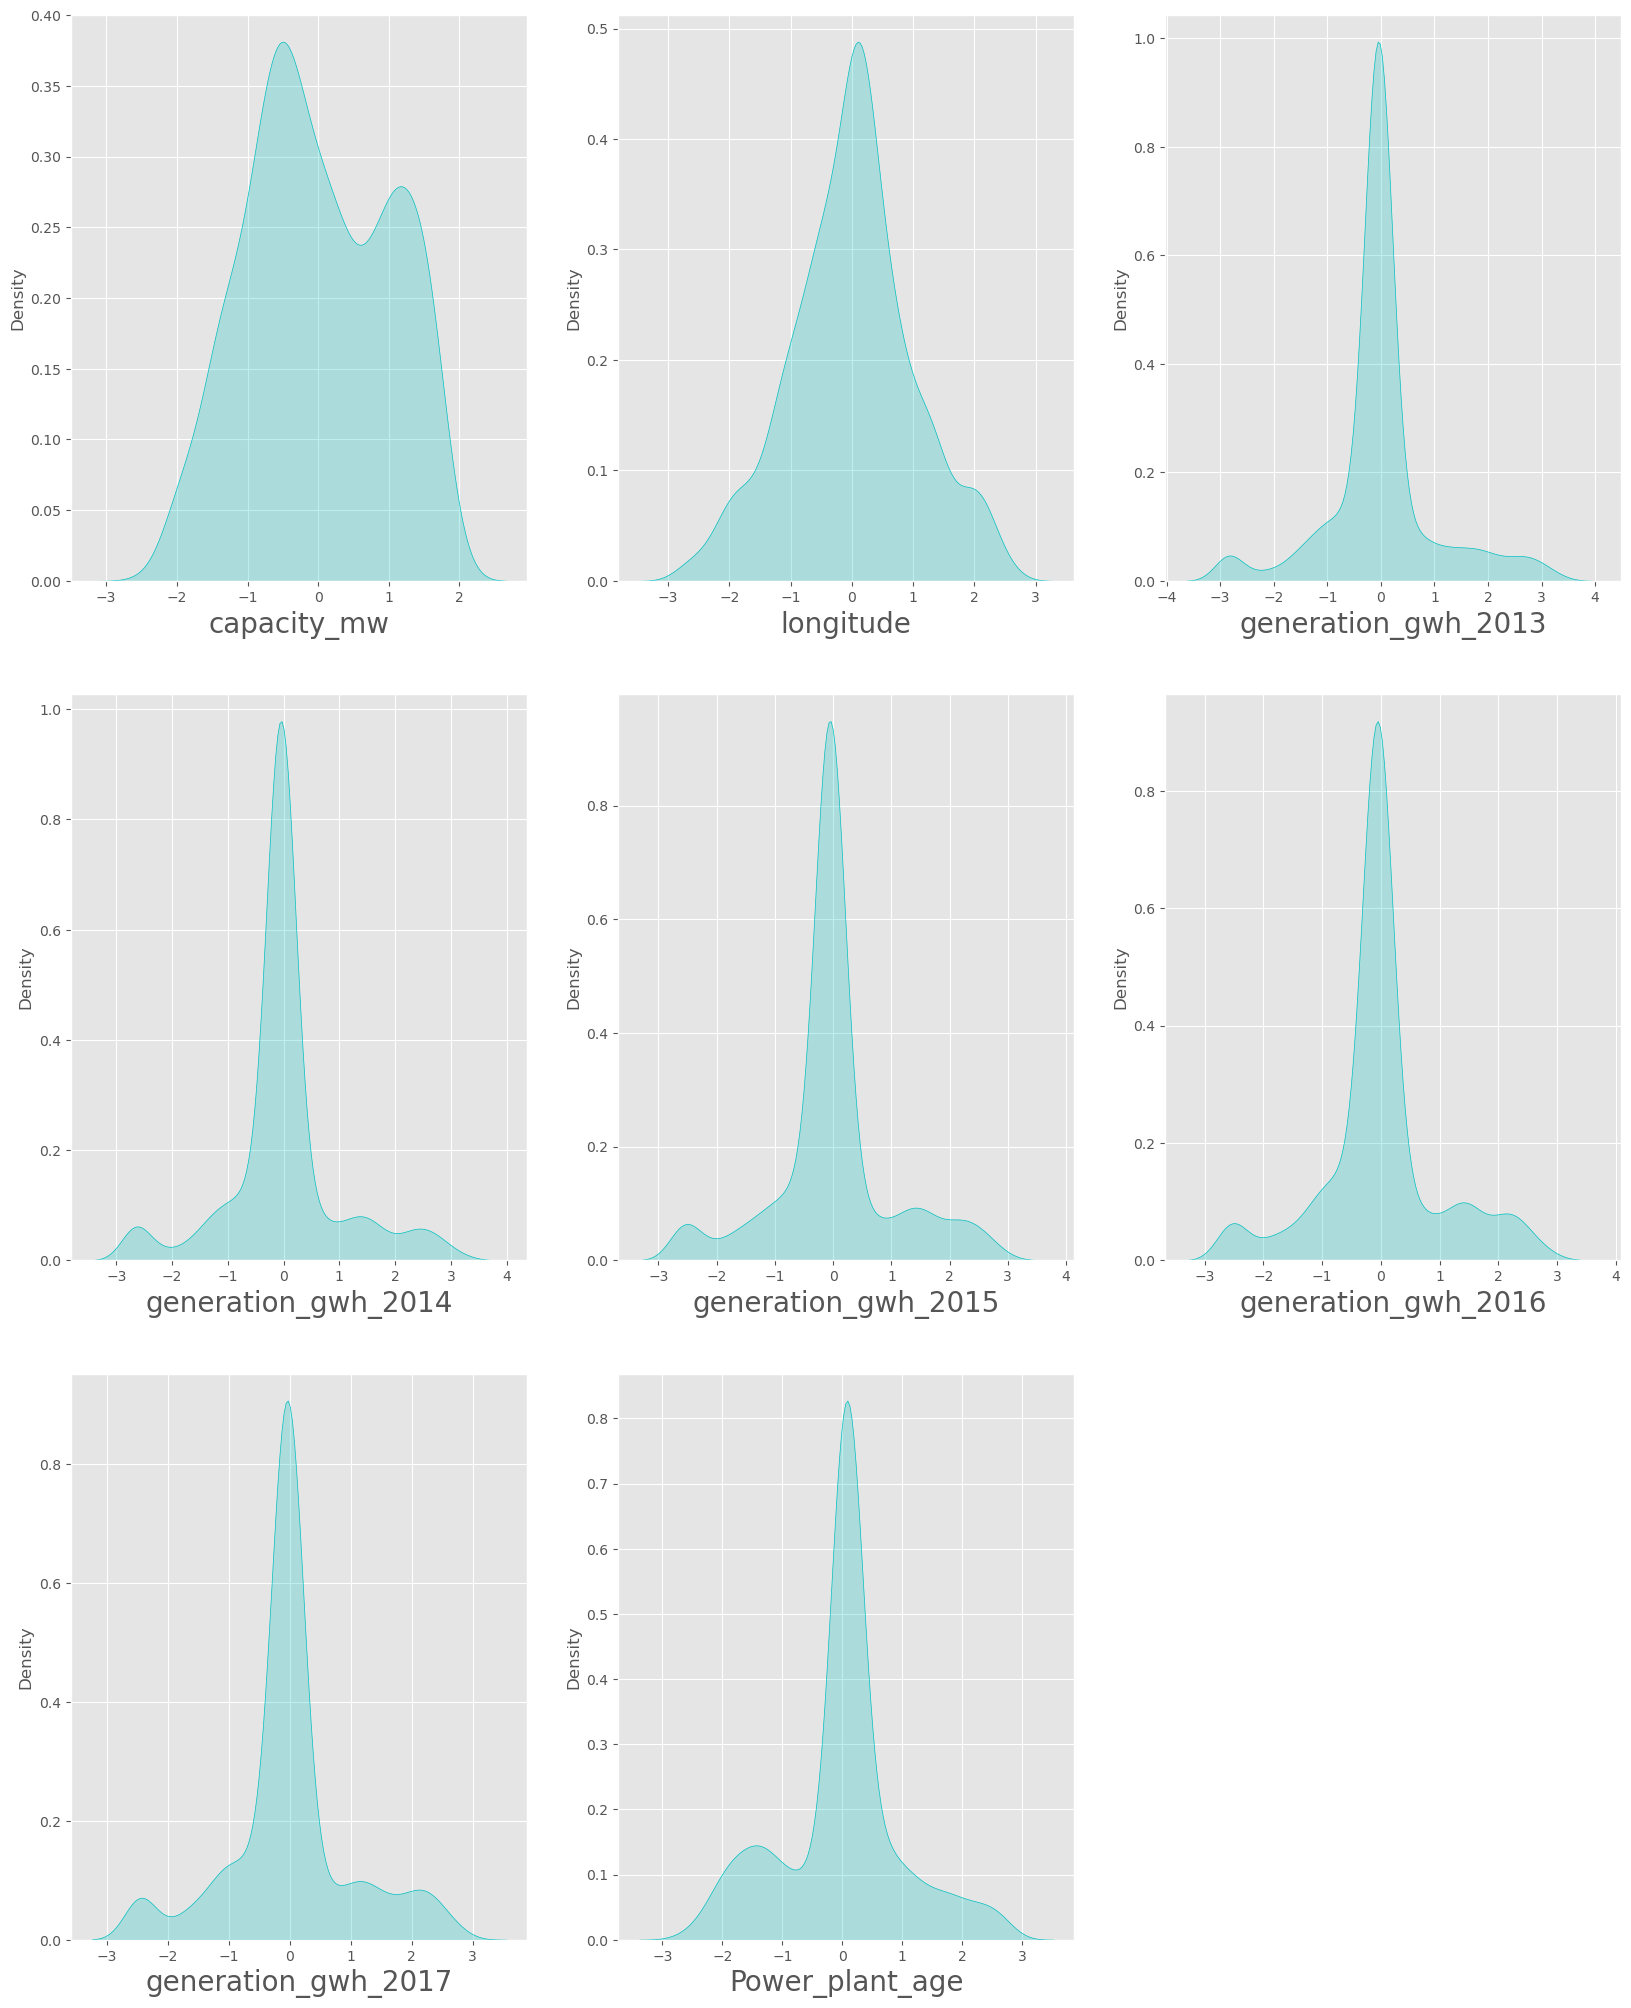

In [114]:
#Let's check how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='c',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The data is not normal but we can notice the skeweness has been removed

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

capacity_mw  longitude    source  geolocation_source  \
0      -1.675434  -0.924039  1.399156           -1.037509   
1       0.214717  -0.500630  2.823623            0.406866   
2      -0.280583  -2.373612 -0.529352            0.406866   
3       0.386767   2.492970 -0.507437            0.406866   
4       1.740344   1.285220 -0.507437            0.406866   
..           ...        ...       ...                 ...   
847     1.680420   0.237064 -0.507437            0.406866   
848    -1.597071   0.429134  0.697881           -2.481884   
849    -0.513131  -0.223563 -0.529352            0.406866   
850     0.105331  -0.762359  0.303413            0.406866   
851    -0.746937   0.266233 -0.529352            0.406866   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0              -0.044354            -0.045943            -0.052896   
1              -0.044354            -0.045943            -0.052896   
2              -0.044354            -0.045943            -0.052896   
3              -0.259129            -0.276296             0.101229   
4               0.743909             1.423753             2.285309   
..                   ...                  ...                  ...   
847            -0.044354            -0.045943            -2.448545   
848            -0.044354            -0.045943            -0.052896   
849            -0.044354            -0.045943            -0.052896   
850            -0.044354            -0.045943            -0.052896   
851            -0.044354            -0.045943            -0.052896   

     generation_gwh_2016  generation_gwh_2017  Power_plant_age  
0              -0.054610            -0.039236        -1.138596  
1              -0.054610            -0.039236         0.078356  
2              -0.054610            -0.039236         0.078356  
3               0.118902            -0.192428        -0.306973  
4               2.271019             1.972415        -1.802274  
..                   ...                  ...              ...  
847            -0.825789             0.016799        -2.017970  
848            -0.054610            -0.039236         0.078356  
849            -0.054610            -0.039236         0.078356  
850            -0.054610            -0.039236         0.078356  
851            -0.054610            -0.039236         0.078356  

[852 rows x 10 columns]

- So here we have scaled the data using Standard Scalarization method to overcome with the issue of data biasness.
- As we have observed in the heat map there is multicolineanity issue exists in the data. so let's check the VIF value and if the columns have VIF>10 then we can drop those columns.

# Checking VIF values

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x_df.values,i)
                    for i in range(len(x_df.columns))]
vif['Features'] = x_df.columns
vif

VIF values             Features
0    1.827367          capacity_mw
1    1.199592            longitude
2    1.412236               source
3    1.588651   geolocation_source
4    5.468598  generation_gwh_2013
5    7.212366  generation_gwh_2014
6    6.182418  generation_gwh_2015
7    9.655331  generation_gwh_2016
8    5.231173  generation_gwh_2017
9    1.182482      Power_plant_age

- The VIF value is less than 10 in all the columns which means we are free from multicolinearity problem.

In [117]:
y_df.value_counts()

Fuel_Type
1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: count, dtype: int64

- Here we can observe that the target variable Fuel_Type has multi classes means it is multiclassification problem.
- Also the data is not balanced so we will use oversampling method to balance the data.

# Oversampling

In [118]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df,y_df = SM.fit_resample(x_df,y_df)

In [119]:
y_df.value_counts()


Fuel_Type
6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: count, dtype: int64

- Since the highest count of the target is 240 so the data is balanced by oversampling all the classes to the count 240.

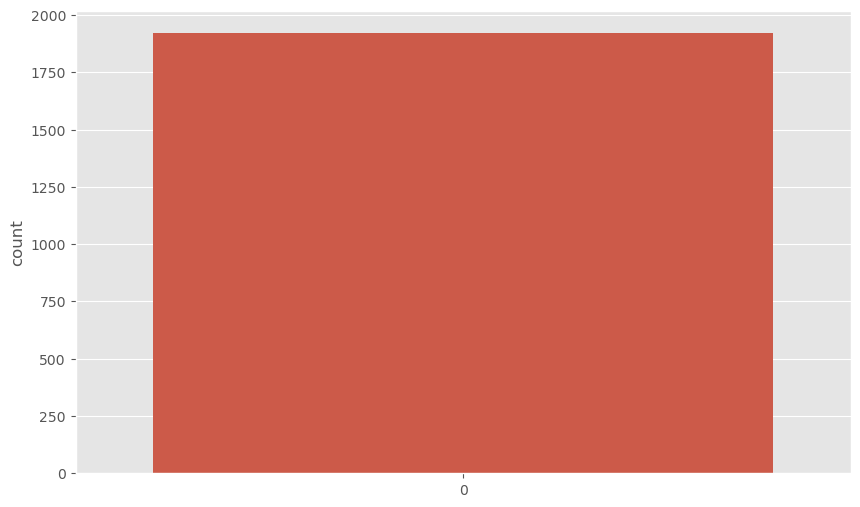

In [120]:
#Visualize the data after balancing 
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

- Here we can clearly visualize the data in all the types are equal.

In [121]:
x_df.head()

capacity_mw  longitude    source  geolocation_source  generation_gwh_2013  \
0    -1.675434  -0.924039  1.399156           -1.037509            -0.044354   
1     0.214717  -0.500630  2.823623            0.406866            -0.044354   
2    -0.280583  -2.373612 -0.529352            0.406866            -0.044354   
3     0.386767   2.492970 -0.507437            0.406866            -0.259129   
4     1.740344   1.285220 -0.507437            0.406866             0.743909   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            -0.045943            -0.052896            -0.054610   
1            -0.045943            -0.052896            -0.054610   
2            -0.045943            -0.052896            -0.054610   
3            -0.276296             0.101229             0.118902   
4             1.423753             2.285309             2.271019   

   generation_gwh_2017  Power_plant_age  
0            -0.039236        -1.138596  
1            -0.039236         0.078356  
2            -0.039236         0.078356  
3            -0.192428        -0.306973  
4             1.972415        -1.802274

- This is the dataframe after preprocessing and cleaning the data

# Modeling 

# Finding The Best Random State

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size = .30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.9079861111111112 on Random_state 57


# Creating train_test_split

In [123]:
x_df_tain,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size= .30,random_state=maxRS)

- We have created a new train test split using Random State

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [125]:
#checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

#prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))

0.1284722222222222
[[ 6 10  6 10 14 14 12  9]
 [ 6  7  9  5  4  7 14  4]
 [ 2 13 13 11 10 12  9  8]
 [13 13  6 10 11  1 11  4]
 [ 6  9 12 11 11  7 11  3]
 [ 8 14  6 16  7  9 12  6]
 [ 9 10 11  8  8  7  8  5]
 [14  9 17  5  8  6  9 10]]
              precision    recall  f1-score   support

           0       0.09      0.07      0.08        81
           1       0.08      0.12      0.10        56
           2       0.16      0.17      0.16        78
           3       0.13      0.14      0.14        69
           4       0.15      0.16      0.15        70
           5       0.14      0.12      0.13        78
           6       0.09      0.12      0.11        66
           7       0.20      0.13      0.16        78

    accuracy                           0.13       576
   macro avg       0.13      0.13      0.13       576
weighted avg       0.13      0.13      0.13       576



- So here we are getting 13% accuracy using DTC

We can also observe the confusion matrix which contains True-Positive, False-Positive rate and False-Negative, True-Negative rate.

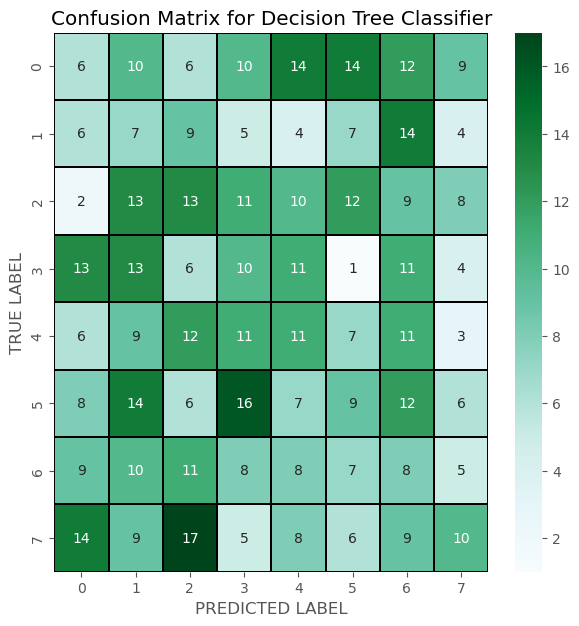

In [126]:
# Let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [127]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

#prediction
predRFC =RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test,predRFC))


0.11979166666666667
[[ 6 15  6  6 13 14 11 10]
 [ 6  5  8  4  6  9 12  6]
 [ 2 14 12  9 10 12 10  9]
 [15 11  7 11 10  1 10  4]
 [ 8 10 11  9  8  8 12  4]
 [ 6 14  6 15  7 12 10  8]
 [ 6  9 10  9  9  9  8  6]
 [14 13 16  6  7  6  9  7]]
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        81
           1       0.05      0.09      0.07        56
           2       0.16      0.15      0.16        78
           3       0.16      0.16      0.16        69
           4       0.11      0.11      0.11        70
           5       0.17      0.15      0.16        78
           6       0.10      0.12      0.11        66
           7       0.13      0.09      0.11        78

    accuracy                           0.12       576
   macro avg       0.12      0.12      0.12       576
weighted avg       0.12      0.12      0.12       576



- The  Random Forest Classifier has accuracy 12%

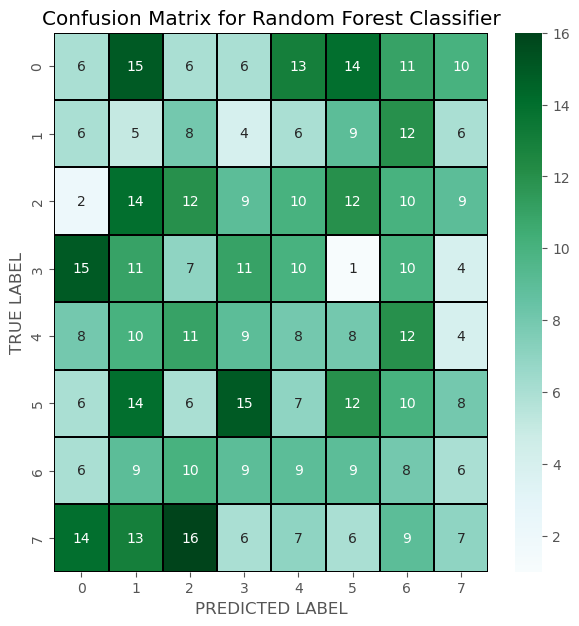

In [128]:
# Let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# support Vector Classifier

In [129]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

#prediction
predsvc =svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))


0.08854166666666667
[[ 0 24  0  0  0 57  0  0]
 [ 1 15  9  4  5  7 13  2]
 [ 1 29  3  6  9  9 12  9]
 [12 26  2  7  2  1 17  2]
 [ 0 31  2 14  8  6  7  2]
 [ 3 18  0 27  0 18 12  0]
 [ 3 10 28  0 17  3  0  5]
 [23 55  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.07      0.27      0.11        56
           2       0.07      0.04      0.05        78
           3       0.12      0.10      0.11        69
           4       0.20      0.11      0.14        70
           5       0.18      0.23      0.20        78
           6       0.00      0.00      0.00        66
           7       0.00      0.00      0.00        78

    accuracy                           0.09       576
   macro avg       0.08      0.09      0.08       576
weighted avg       0.08      0.09      0.08       576



- The accuracy using SVC is 12%

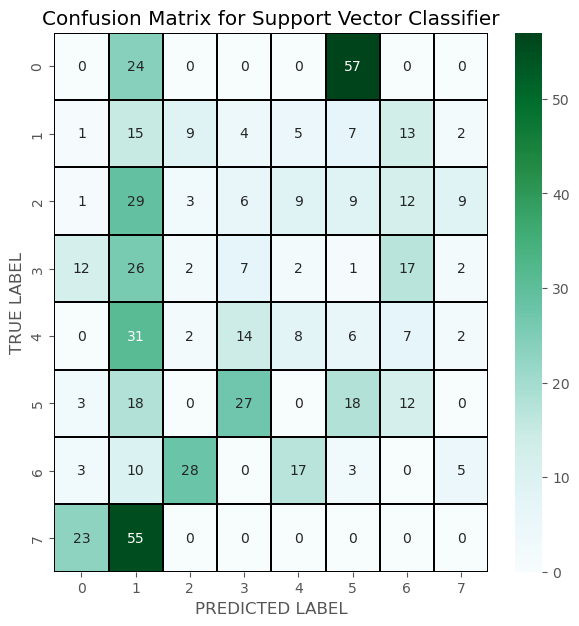

In [130]:
#Let's plot confusion matrix for SVC

cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# KNeighbors Classifier

In [131]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

#prediction
predknn =knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test,predknn))

0.11284722222222222
[[14 14  4 10  9 12  8 10]
 [ 8  7  9  6  5  4 10  7]
 [14 14  6 11 11 11  8  3]
 [25  7  7  9  7  4  7  3]
 [11  9 12  6 11  6 10  5]
 [18 11  2 23  3  7  6  8]
 [14 18 11  8  5  1  3  6]
 [20 21 10  5  7  3  4  8]]
              precision    recall  f1-score   support

           0       0.11      0.17      0.14        81
           1       0.07      0.12      0.09        56
           2       0.10      0.08      0.09        78
           3       0.12      0.13      0.12        69
           4       0.19      0.16      0.17        70
           5       0.15      0.09      0.11        78
           6       0.05      0.05      0.05        66
           7       0.16      0.10      0.12        78

    accuracy                           0.11       576
   macro avg       0.12      0.11      0.11       576
weighted avg       0.12      0.11      0.11       576



- The accuracy using KNN is 10%

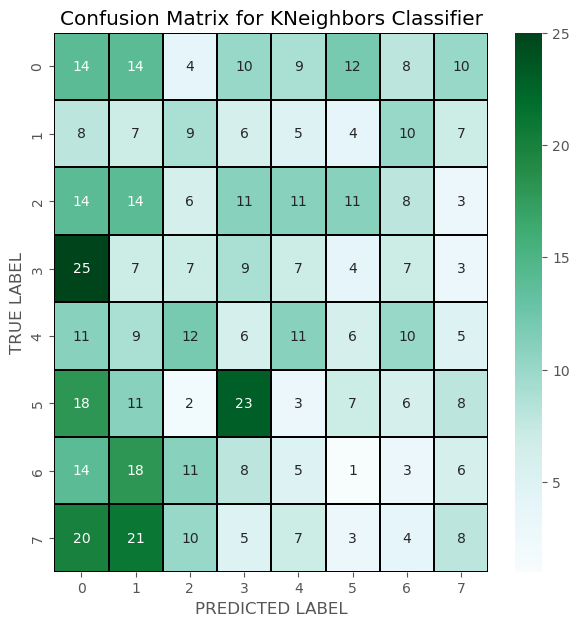

In [132]:
# Let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Gradient Bossting Classifier

In [133]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

#prediction
predGB =GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.0954861111111111
[[ 2 21 10  4  9 15  8 12]
 [ 4  5  7  3 12  8 12  5]
 [ 2 18 10 13  8  8 10  9]
 [14 11  9 12  6  2 12  3]
 [ 9 10  8 10  9  9 11  4]
 [ 9 15  2 17  6 10 12  7]
 [ 2 15 15  3  9  6  4 12]
 [14 26 15  3 10  2  5  3]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.03        81
           1       0.04      0.09      0.06        56
           2       0.13      0.13      0.13        78
           3       0.18      0.17      0.18        69
           4       0.13      0.13      0.13        70
           5       0.17      0.13      0.14        78
           6       0.05      0.06      0.06        66
           7       0.05      0.04      0.05        78

    accuracy                           0.10       576
   macro avg       0.10      0.10      0.10       576
weighted avg       0.10      0.10      0.10       576



- The accuracy using GB is 13%

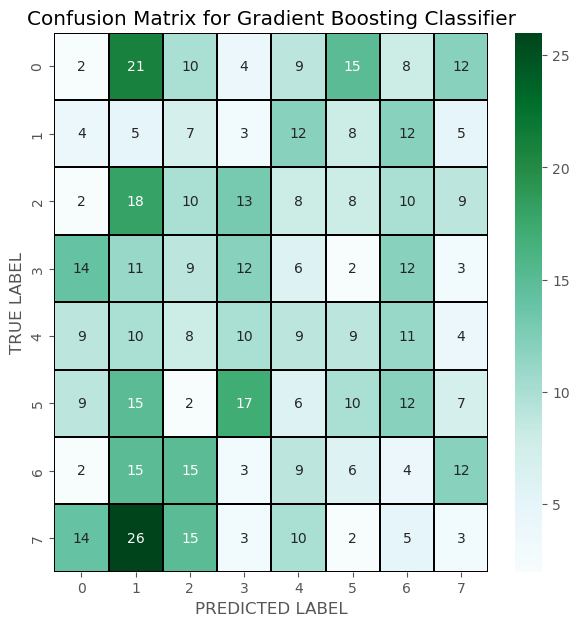

In [134]:
#Let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Bagging Classifier

In [135]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

#prediction
predBC =BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test,predBC))

0.1284722222222222
[[ 5 16  7  7 14 12 10 10]
 [10  8  8  4  6  7 10  3]
 [ 3 16 10  7  9 15  9  9]
 [12 12  7 12 13  1  9  3]
 [10  9 12  7  9  8 11  4]
 [ 8 14  5 14  7 14 11  5]
 [ 7 10 12  8  7  8  8  6]
 [16 11 18  3  9  4  9  8]]
              precision    recall  f1-score   support

           0       0.07      0.06      0.07        81
           1       0.08      0.14      0.11        56
           2       0.13      0.13      0.13        78
           3       0.19      0.17      0.18        69
           4       0.12      0.13      0.12        70
           5       0.20      0.18      0.19        78
           6       0.10      0.12      0.11        66
           7       0.17      0.10      0.13        78

    accuracy                           0.13       576
   macro avg       0.13      0.13      0.13       576
weighted avg       0.14      0.13      0.13       576



- The accuracy using BC is 12%

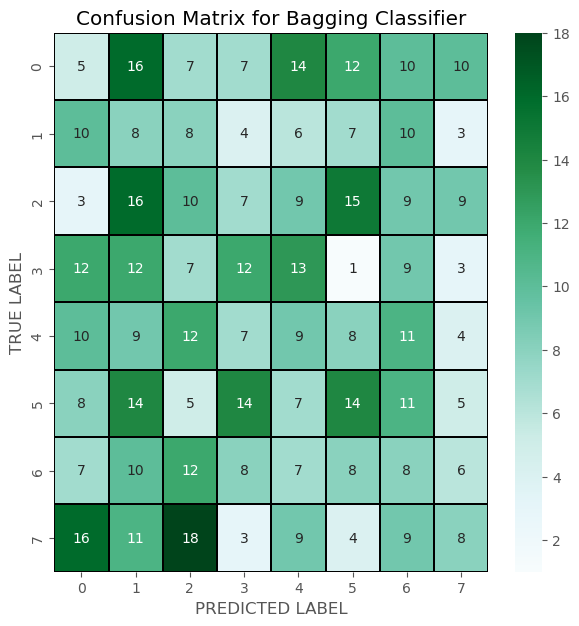

In [136]:
#Let's plot confusion matrix for BC
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ['0','1','2','3','4','5','6','7']
y_axis_labels = ['0','1','2','3','4','5','6','7']

f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths =.2,linecolor='black',fmt ='.0f', ax=ax, cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

# Checking the Cross Validation Score

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
#cv score for Decision Tree Classifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.8708333333333332


In [139]:
#cv score for Random Forest Classifier
print(cross_val_score(RFC, x_df,y_df,cv=5).mean())

0.90625


In [140]:
#cv score for Support Vector Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7921875


In [141]:
#cv score for KNeighbors Classifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.8463541666666666


In [142]:
#cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.903125


In [143]:
#cv score for Bagging Classifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.8973958333333334


- Above are the cross validation score for all the models used.

The difference between accuracy score and cross validation score of Random Forest Classifier is very less compared to other models

- So we can conclude that Random Forest Classifier as our best fitting model.

# Hyper Parameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
# Random Forest Classifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}
    

In [146]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [147]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [148]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

- These are the  best parameter values

In [149]:
fuel_type = RandomForestClassifier (criterion ='log_loss', max_depth=2, max_features='sqrt', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

7.8125


- So here we can see the accuracy of the best model is increased after tuning which is good.

# Plotting ROC and compare AUC for the final model

Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

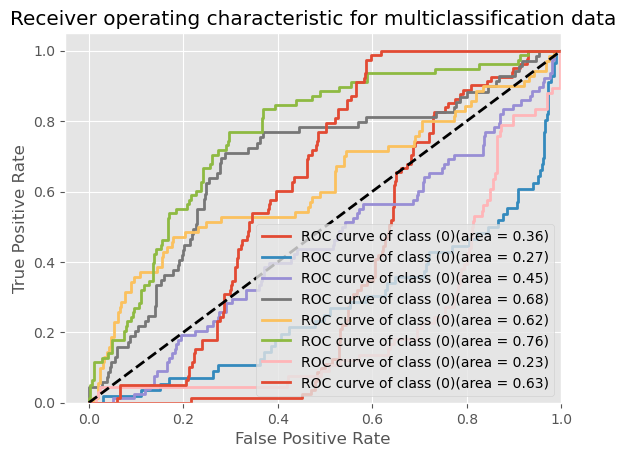

In [154]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train,y_df_train).predict_proba(x_df_test)

#Binarize the output
classes = [0, 1, 2, 3, 4, 5, 6, 7]
#y_df_test_bin = label_binarize(y_df_test, classes[0,1,2,3,4,5,6,7])
y_df_test_bin = label_binarize(y_df_test, classes=classes)
n_classes = 8

#Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i],true_positive_rate[i],_=roc_curve (y_df_test_bin[:,i],y_score[:,i])
    roc_auc[i] = auc(false_positive_rate[i],true_positive_rate[i])
    
for i in range (n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i],lw=2, label='ROC curve of class (0)(area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc ='lower right')
plt.show()

- This is the AUC-ROC curve for the final model and is plotted False positive rate against True positive rate.

Here we can observe the area of all the fuel types.

# Saving the Model

In [156]:
import joblib
joblib.dump(fuel_type,'Global_Power_Fuel_Type.pkl')

['Global_Power_Fuel_Type.pkl']

- We have saved the final model using joblib.

# Conclusion

- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 70%
- The final Accuracy for the prediction for Fuel_Type of the power plant using Classification algorithm is = 90%